In [13]:
# install.packages('plyr')
# install.packages('dplyr')
install.packages(c('Hmisc','viridis','naniar','xtable','schoRsch','gmodels','readr','emmeans','rstatix','multcomp','sandwich','pim','stargazer','survival','survminer','ggplot2','finalfit'tt))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘SparseM’, ‘MatrixModels’, ‘markdown’, ‘png’, ‘jpeg’, ‘interp’, ‘checkmate’, ‘htmlwidgets’, ‘gtools’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘quadprog’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘exactRankTests’, ‘KMsurv’, ‘km.ci’, ‘gridtext’, ‘reshape’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘norm’, ‘visdat’, ‘UpSetR’, ‘gdata’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘car’, ‘TH.data’, ‘zoo’, ‘nleqslv’, ‘BB’, ‘ggpubr’, ‘maxstat’, ‘survMisc’, ‘ggtext’, ‘bdsmatrix’, ‘GGally’, ‘lme4’, ‘mice’, ‘pROC’




In [14]:
library(plyr)
library(dplyr)
library(Hmisc)
library(viridis)  
library(naniar)
library(xtable)
library(schoRsch)
library(gmodels)
library(readr)
library(emmeans)
library(rstatix)
library(multcomp)
library(sandwich)
library(pim)
library(stargazer)
library(survival)
library(survminer)
library(finalfit)
library(ggplot2)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:plyr’:

    is.discrete, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: viridisLite


Attaching package: ‘xtable’


The following objects are masked from ‘package:Hmisc’:

    label, label<-



Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter


Loading required package: mvtnorm

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:rstatix’:

    select


The following object is masked from ‘package:dplyr’:

    select





# 1. Data Wrangling and Feature engineering

In [21]:
options(warn=-1)

In [195]:
countriesHDI= read.csv('countries.HDI.csv',sep=',',col.names = c('Country','HDI','index'))
head(countriesHDI)

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): (converted from warning) input string 1 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_html.dat

  Country                  HDI index
1 Australie                TH  2    
2 Etats-Unis d'Am\xe9rique TH  3    
3 Pays-Bas                 TH  4    
4 Allemagne                TH  5    
5 Nouvelle-Z\xe9lande      TH  6    
6 Irlande                  TH  7    

In [193]:
effec1.quest.compil= read.csv('effec1.quest.compil.csv',sep=',',row.names=NULL)
head(effec1.quest.compil)

,Student_ID,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,⋯,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,encad.diffic,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
1,221,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,19178,une femme,1986,France,Bac+5 (Master ou <e9>quivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune exp<e9>rience en cr<e9>ation d'entreprise,4,⋯,NA,NA,NA,NA,NA,NA,TH,TH,Cadres et professions intellectuelles,Moins de deux heures
3,1086,une femme,1967,France,Bac+5 (Master ou <e9>quivalent),"Sciences sociales (<e9>conomie\, sciences politiques\, sociologie\, etc)","Artisans, commer<e7>ants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de cr<e9>er mon entreprise (phase de d<e9>marrage),2,⋯,NA,NA,NA,NA,NA,NA,TH,TH,"Artisans, commer<e7>ants, chefs d'entreprise",Moins de deux heures
4,1948,une femme,1983,Allemagne,Bac ou <e9>quivalent,Droit,Employ<e9>s,par une communication de Unow,Je n'ai aucune exp<e9>rience en cr<e9>ation d'entreprise,1,⋯,NA,NA,NA,NA,NA,NA,TH,TH,Employ<e9>s,Moins de deux heures
5,16209,une femme,NA,Madagascar,Bac+3 (Licence ou <e9>quivalent),"Sciences naturelles (Agronomie\, biologie\, physique\, chimie\, etc)",Professions interm<e9>diaires,par un ami ou une connaissance,J<92>ai un projet de cr<e9>ation d<92>entreprise (phase de r<e9>flexion),1,⋯,NA,NA,NA,NA,NA,NA,B,B,Autre,Moins de deux heures
6,6685,un homme,1951,NA,Bac+5 (Master ou <e9>quivalent),Ing<e9>nierie et technologies,Retrait<e9>s,par une communication de Unow,Je n'ai aucune exp<e9>rience en cr<e9>ation d'entreprise,1,⋯,Difficile,De 4 <e0> 8 heures,"Non\, j<92>ai compris ce qu<92><e9>tait le Laboratoire mais je n<92>y ai pas particip<e9>",Tr<e8>s satisfaisante,3,NA,NA,NA,Autre,Plus de six heures


In [199]:
effec2.quest.compil=read_csv('effec2.quest.compil.csv')
head(effec2.quest.compil)

Rows: 4078 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (28): Section, Gender, Country, Diploma, Formation, CSP, How.heard, Exp....
dbl (11): Student_ID, Current.Score, Curiosity.MOOC, Certif.self.sat, Rencon...
num  (1): birth.year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Student_ID,Current.Score,Section,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,⋯,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin,EMLyon.et
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
32360,NA,"Laboratoire, Effectuation #2",une femme,1967,France,Bac+5 (Master ou <e9>quivalent),"Sciences humaines (histoire\, arch<e9>ologie\, philosophie\, etc)",Cadres et professions intellectuelles,par un ami ou une connaissance,⋯,Tr<e8>s facile,De 1 <e0><a0> 2 heures,"Oui\, j'ai soumis un projet en tant que Porteur de Projet",Satisfaisante,5,TH,TH,Cadres et professions intellectuelles,Moins de deux heures,0
27582,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
27808,NA,Effectuation #2,un homme,1986,Ha<ef>ti,Bac+3 (Licence ou <e9>quivalent),Management/Gestion d entreprise,En recherche d'emploi,autre,⋯,Moyen,Plus de 8 heures,"Oui\, je suis devenu Coach sur au moins un projet et j'ai laiss<e9> des commentaires",Tr<e8>s satisfaisante,5,B,B,En recherche d'emploi,Entre quatre et six heures,0
27532,NA,"Laboratoire, Effectuation #2",un homme,1975,France,Bac ou <e9>quivalent,Droit,Cadres et professions intellectuelles,par un ami ou une connaissance,⋯,Facile,De 2 <e0><a0> 4 heures,"Oui\, j'ai soumis un projet en tant que Porteur de Projet",Tr<e8>s satisfaisante,2,TH,TH,Cadres et professions intellectuelles,Entre deux et quatre heures,0
17343,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2630,NA,Effectuation #2,un homme,1957,Madagascar,Bac+5 (Master ou <e9>quivalent),Management/Gestion d entreprise,Cadres et professions intellectuelles,par un article ou un blog sur Internet,⋯,NA,NA,NA,NA,NA,B,B,Cadres et professions intellectuelles,Moins de deux heures,0


In [201]:
effec3.quest.compil=read.csv('effec3.quest.compil.csv',sep=',',row.names=NULL)
head(effec3.quest.compil)
length(colnames((effec3.quest.compil)))

,Student_ID,Certif.bin,Section,Gender,birth.year,Country,Diploma,EMLYON.et,Formation,CSP,⋯,Incitation,Temps.Dispo,Exp.MOOC,Completion.proba,EMLyon,Country_HDI,Country_HDI.fin,age,CSP.fin,Temps.dispo.fin
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,68029,1,MOOC Effectuation #3,un homme,1982,France,Bac+5 (Master ou <e9>quivalent),Non,"Math<e9>matiques\, informatique","Artisans, commerçants, chefs d'entreprise",⋯,1,Entre deux et quatre heures,"Non, c'est ma premi<e8>re participation à un MOOC",5,Non,TH,TH,31,"Artisans, commerçants, chefs d'entreprise",Entre deux et quatre heures
2,66198,1,"Laboratoire, Laboratoire Effectuation #3, MOOC Effectuation #3",un homme,1994,Maroc,"Bac+2 (Deug, IUT, BTS ou <e9>quivalent)",Non,"Sciences sociales (<e9>conomie\, sciences politiques\, sociologie\, etc)",Etudiants,⋯,4,Entre deux et quatre heures,"Non, c'est ma premi<e8>re participation à un MOOC",5,Non,H,H&M,19,Etudiants,Entre deux et quatre heures
3,68052,1,MOOC Effectuation #3,un homme,1988,Maroc,Bac+5 (Master ou <e9>quivalent),Oui,"Math<e9>matiques\, informatique",Cadres et professions intellectuelles,⋯,4,Entre deux et quatre heures,"Non, c'est ma premi<e8>re participation à un MOOC",4,Oui,H,H&M,25,Cadres et professions intellectuelles,Entre deux et quatre heures
4,14161,1,"Laboratoire, MOOC Effectuation #3",un homme,1984,Niger,Bac+5 (Master ou <e9>quivalent),Non,Ing<e9>nierie et technologies,Employ<e9>s,⋯,NA,Entre une et deux heures,"Oui, dont certains int<e9>gralement",3,Non,B,B,29,Employ<e9>s,Moins de deux heures
5,64444,1,"MOOC Effectuation #3, Laboratoire",un homme,1989,C<f4>te d'Ivoire,"Bac+2 (Deug, IUT, BTS ou <e9>quivalent)",Non,Management/Gestion d'entreprise,Cadres et professions intellectuelles,⋯,5,Entre deux et quatre heures,"Non, c'est ma premi<e8>re participation à un MOOC",5,Non,B,B,24,Cadres et professions intellectuelles,Entre deux et quatre heures
6,64819,1,"Laboratoire, Laboratoire Effectuation #3, MOOC Effectuation #3",un homme,1964,Belgique,Bac+5 (Master ou <e9>quivalent),Non,"Math<e9>matiques\, informatique",Cadres et professions intellectuelles,⋯,3,Entre deux et quatre heures,"Non, c'est ma premi<e8>re participation à un MOOC",5,Non,TH,TH,49,Cadres et professions intellectuelles,Entre deux et quatre heures


[1] 26

In [202]:
usages.effec1=read.csv('usages.effec1.csv',sep=',',row.names=NULL)
head(usages.effec1)
length(colnames(usages.effec1))

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,⋯,Post.forum.4,Post.forum.4.2,view.forum.4,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,28,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,0,0,0,1,0
2,36,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,0,0,0,0,0
3,45,NA,0,NA,0,16,1,20,1,18,⋯,0,0,1,1,0,0,1,1,34,5
4,83,NA,0,60,1,13,1,20,1,18,⋯,0,0,1,0,0,0,1,0,29,5
5,84,NA,0,NA,0,18,1,20,1,NA,⋯,0,0,0,0,0,0,0,0,23,2
6,87,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,0,0,0,2,0


[1] 73

In [205]:
usages.effec2=read.csv('usages.effec2.csv',sep=',',row.names=NULL)
head(usages.effec2)
length(colnames(usages.effec2))

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,⋯,Post.forum.4.2,view.forum.4,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,15,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,1,0,0,0,0,0,3,0,0
2,26,NA,0,NA,0,20.0,1,NA,0,NA,⋯,0,0,0,0,0,0,0,3,1,0
3,151,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,0,0,0,0,0
4,260,NA,0,NA,0,17.1,1,16.33333,1,NA,⋯,0,0,0,0,0,0,0,14,2,0
5,263,NA,0,NA,0,14.6,1,11.00000,1,NA,⋯,0,0,0,0,0,0,0,7,2,0
6,430,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,0,0,8,0,0


[1] 74

In [206]:
usages.effec3=read.csv('usages.effec3.csv',sep=',',row.names=NULL)
head(usages.effec3)
length(colnames(usages.effec3))

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,⋯,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice,Post.forum.fonc.cours,view.forum.fonc.cours
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,15,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,2,0,0,0,0
2,34,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,0,0,0,0,0
3,88,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,2,0,0,0,0
4,95,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,2,0,0,0,0
5,115,NA,0,NA,0,NA,0,NA,0,NA,⋯,0,0,0,0,0,0,0,0,0,0
6,118,38.45,1,NA,0,17.1,1,17.66667,1,16.66667,⋯,0,0,0,0,0,0,5,0,0,0


[1] 76

## combining usage 1,2,3 rbind

In [207]:
usages.effec1 =filter(usages.effec1,Student_ID %nin% usages.effec2$Student_ID)

In [208]:
usages.effec1_usages.effec2=(rbind.fill(usages.effec1,usages.effec2))

In [209]:
usages.effec1_usages.effec2=filter(usages.effec1_usages.effec2,Student_ID %nin% usages.effec3$Student_ID)

In [210]:
usages1_2_3=(rbind.fill(usages.effec1_usages.effec2,usages.effec3))

In [211]:
dim(usages1_2_3)

[1] 14974    76

## combining effec 1,2,3 rbind

In [212]:
effec1.quest.compil = filter(effec1.quest.compil,Student_ID %nin% effec2.quest.compil$Student_ID)

In [213]:
effec1_2=(rbind.fill(effec1.quest.compil,effec2.quest.compil))

In [214]:
effec1_2 = filter(effec1_2,Student_ID %nin% effec3.quest.compil$Student_ID)

In [215]:
effec1_2_3=(rbind.fill(effec1_2,effec3.quest.compil))

In [216]:
dim(effec1_2_3)

[1] 16526    44

## treating countries

In [217]:
countriesHDI$HDI

[1] "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH"
 [16] "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH"
 [31] "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH" "TH"
 [46] "TH" "TH" "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H" 
 [61] "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H" 
 [76] "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H"  "H" 
 [91] "H"  "H"  "H"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M" 
[106] "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M" 
[121] "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M"  "M" 
[136] "M"  "M"  "M"  "M"  "M"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B" 
[151] "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B" 
[166] "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B" 
[181] "B"  "B"  "B"  "B"  "B"  "B"  "B"  "B"  NA   "TH" "TH" "M"  "M"

In [218]:
# levels(countriesHDI$HDI) <- c(levels(countriesHDI$HDI), "I") 
countriesHDI$HDI[countriesHDI$HDI %in% c("M","H")]  <- "I" 

## joining effec and usage

In [219]:
length(usages1_2_3$Student_ID)

[1] 14974

In [220]:
length(effec1_2_3$Student_ID)

[1] 16526

In [221]:
full_thing_withoutHDI = full_join(usages1_2_3,effec1_2_3,fill=NULL,by = "Student_ID")

In [222]:
dim((full_thing_withoutHDI))

[1] 16943   119

# 1600 by exam.bin


In [223]:
levels(full_thing_withoutHDI$Country_HDI) <- c(levels(full_thing_withoutHDI$Country_HDI), "I") 
full_thing_withoutHDI$Country_HDI[full_thing_withoutHDI$Country_HDI =="M"]  <- "I" 
full_thing_withoutHDI$Country_HDI[full_thing_withoutHDI$Country_HDI =="H"]  <- "I" 
full_thing_withoutHDI$HDI <- full_thing_withoutHDI$'Country_HDI'

In [224]:
df = full_join(x=full_thing_withoutHDI,y=countriesHDI[c("Country","HDI")],by=c("Country",'HDI'))


In [225]:
head(df)

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,⋯,Current.Score,Section,Mot,EMLyon,Proba.reco,EMLyon.et,Certif.bin,EMLYON.et,age,HDI
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>
1,28,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,36,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,45,NA,0,NA,0,16,1,20,1,18,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TH
4,83,NA,0,60,1,13,1,20,1,18,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,I
5,84,NA,0,NA,0,18,1,20,1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,B
6,87,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TH


In [226]:
dim(df)

[1] 17056   120

# Cleaning and Maniputlation

## Subsetting necessary columns

In [227]:
df2_NecCol = df[c('Student_ID' ,'Exam.score', 'Assignment.score' ,'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin', 
                  'Quizz.2.score', 'Quizz.2.bin' ,'Quizz.3.score', 'Quizz.3.bin' ,'Quizz.4.bin' ,'Quizz.4.score', 'Quizz.5.bin', 
                  'Quizz.5.score' ,'Intro.MOOC' ,'Prez.sem.1' ,'S1.L1' ,'S1.L2', 'S1.L3', 'S1.L4' ,'S1.L5' ,'S1.L6' ,'Prez.sem.2', 
                  'S2.L1', 'S2.L2' ,'S2.L3', 'S2.L4','S2.L5' ,'S2.L6' ,'Prez.sem.3', 'S3.L1.1', 'S3.L1.2' ,'S3.L2', 'S3.L3' ,'S3.L4',
                  'S3.L5' ,'Prez.sem.4', 'S4.L1.1' ,'S4.L1.2', 'S4.L2', 'S4.L3' ,'S4.L4', 'S4.L5' ,'Prez.sem.5' ,'S5.L1.1', 'S5.L1.2',
                  'S5.L2' ,'S5.L3', 'S5.L4' ,'S5.L5' ,'last.video', 'last.quizz' ,'Assignment.choice'
                  ,'Gender' ,'birth.year' ,'Country' ,'Diploma' ,'Formation','How.heard' ,'Exp.crea', 'Curiosity.MOOC','Completion.proba',
                  'Instit.brand' ,'motiv.princ' ,'Satisf','Estimated.hours','Plat.satisf','Country_HDI', 'CSP.fin' ,'Temps.dispo.fin', 
                  'Current.Score' ,'Section' ,'Mot', 'Proba.reco'
                  ,'Certif.bin', 'age','Certif.bin','Exam.bin','CSP')]

In [228]:
dim(df2_NecCol)

[1] 17056    79

In [229]:

options(repr.plot.width=10, repr.plot.height=5)

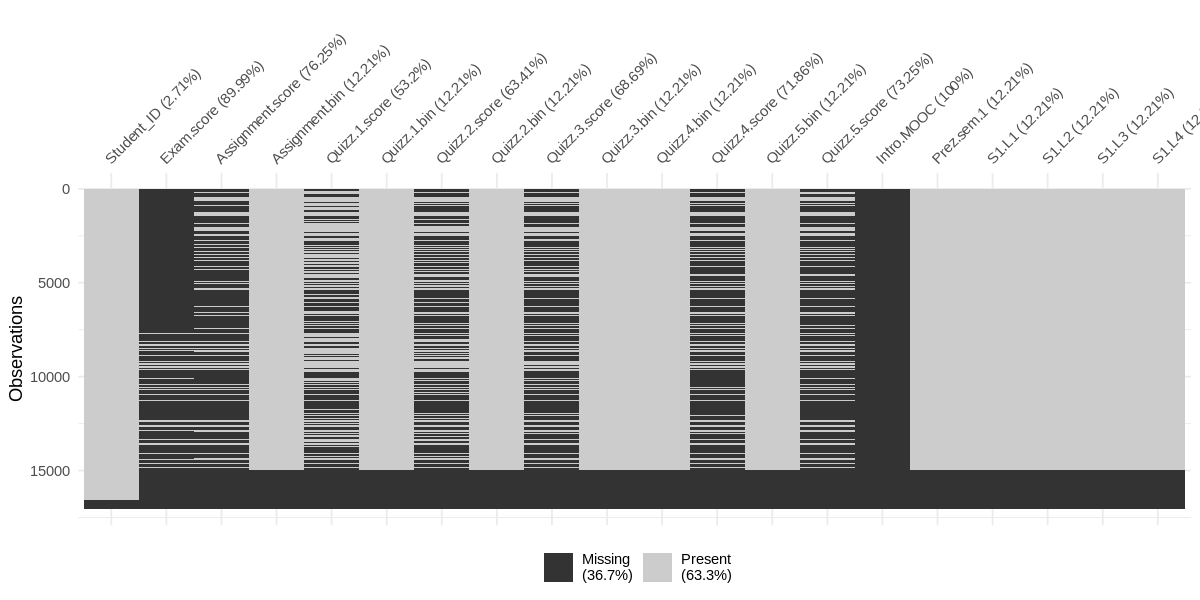

In [230]:
plot(vis_miss(df2_NecCol[c(1:20)], warn_large_data = FALSE))

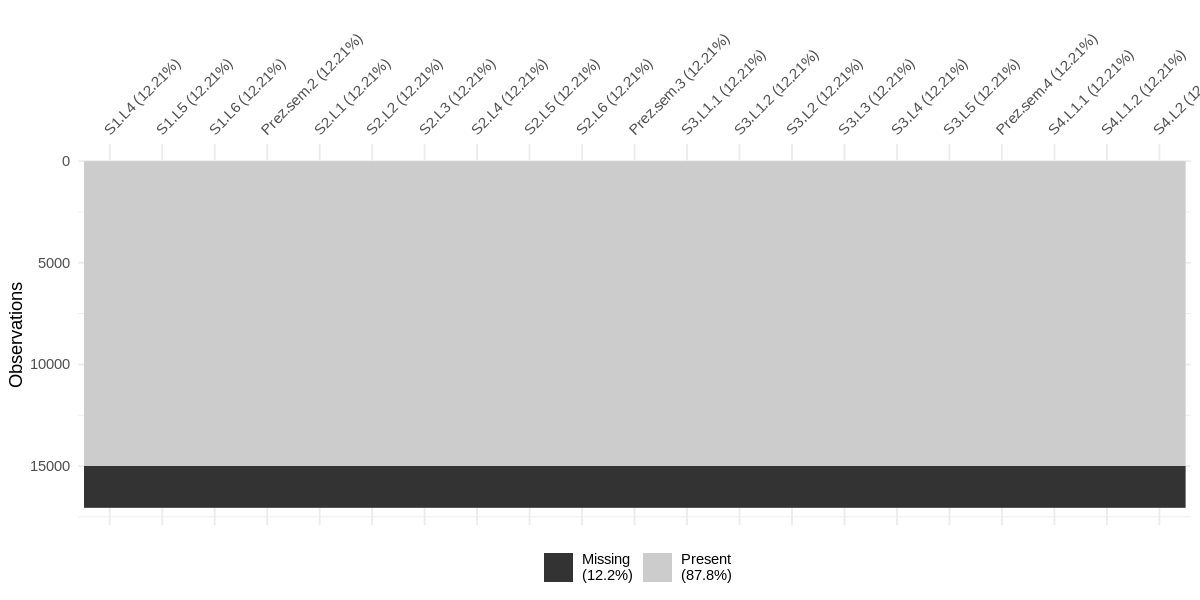

In [231]:
plot(vis_miss(df2_NecCol[c(20:40)], warn_large_data = FALSE))

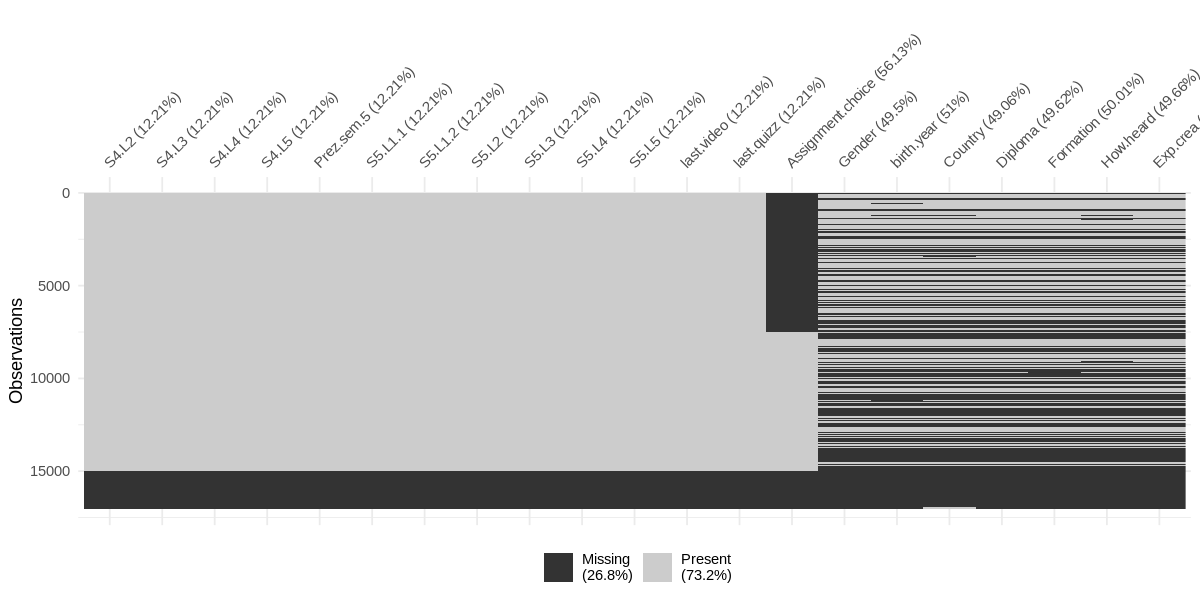

In [232]:
plot(vis_miss(df2_NecCol[c(40:60)], warn_large_data = FALSE))

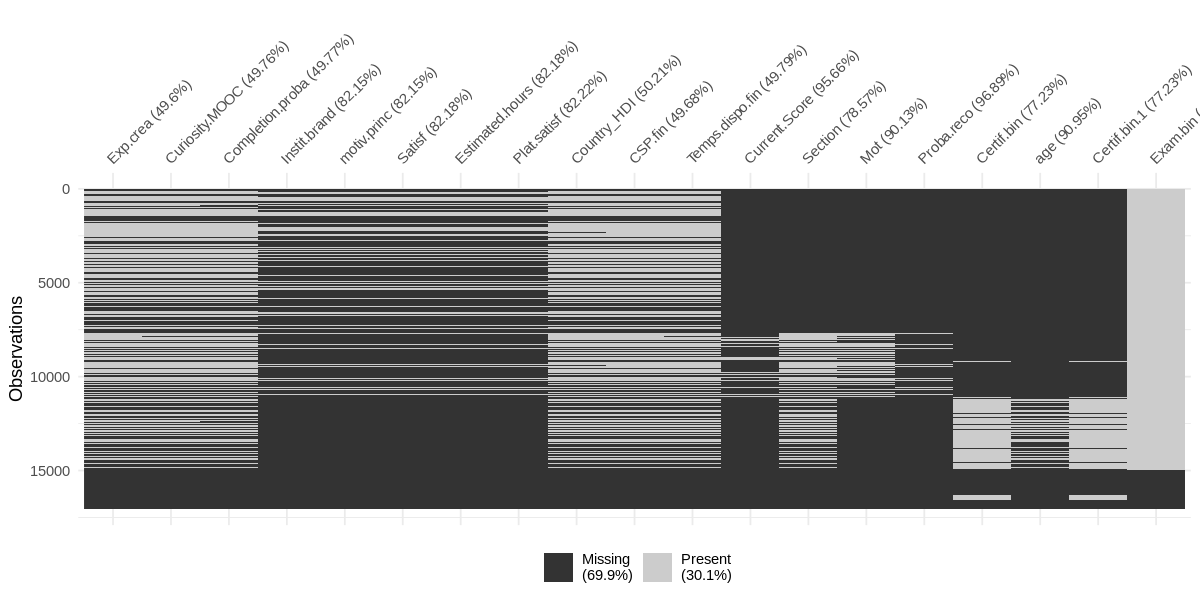

In [233]:
plot(vis_miss(df2_NecCol[c(60:78)], warn_large_data = FALSE))

## remove columns with more than aprox. 60% of missing data

In [234]:
df2_NecCol_clean = df[c('Student_ID' ,'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin','Quizz.2.score', 'Quizz.2.bin'
                  ,'Quizz.3.score', 'Quizz.3.bin' ,'Quizz.4.bin' ,'Quizz.4.score', 'Quizz.5.bin', 
                  'Quizz.5.score'  ,'Prez.sem.1' ,'S1.L1' ,'S1.L2', 'S1.L3', 'S1.L4' ,'S1.L5' ,'S1.L6' ,'Prez.sem.2', 
                  'S2.L1', 'S2.L2' ,'S2.L3', 'S2.L4','S2.L5' ,'S2.L6' ,'Prez.sem.3', 'S3.L1.1', 'S3.L1.2' ,'S3.L2', 'S3.L3' ,'S3.L4',
                  'S3.L5' ,'Prez.sem.4', 'S4.L1.1' ,'S4.L1.2', 'S4.L2', 'S4.L3' ,'S4.L4', 'S4.L5' ,'Prez.sem.5' ,'S5.L1.1', 'S5.L1.2',
                  'S5.L2' ,'S5.L3', 'S5.L4' ,'S5.L5' ,'last.video', 'last.quizz','Gender' ,'birth.year' ,'Country' ,'Diploma' ,
                  'Formation','How.heard' ,'Exp.crea', 'Curiosity.MOOC','Completion.proba','Country_HDI','Country','CSP.fin' ,
                  'Temps.dispo.fin',  'age','Certif.bin','Exam.bin','HDI','CSP')]

In [235]:
unique(df2_NecCol_clean$CSP)

[1] NA                                                                      
 [2] "Cadres et professions intellectuelles"                                 
 [3] "Employ\xe9s"                                                           
 [4] "En recherche d'emploi"                                                 
 [5] "Artisans, commer\xe7ants, chefs d'entreprise"                          
 [6] "Professions interm\xe9diaires"                                         
 [7] "Etudiants"                                                             
 [8] "Inactif (autre que \xe9tudiant, retrait\xe9, ou en recherche d'emploi)"
 [9] "Retrait\xe9s"                                                          
[10] "Agriculteurs-exploitants"                                              
[11] "Ouvriers"                                                              
[12] "Professions interm\xe9diaires"                                         
[13] "Employ\xe9s"                                                           
[14] "Artisans, commer\xe7ants, chefs d'entreprise"                          
[15] "Inactif (autre que \xe9tudiant, retrait\xe9, ou en recherche d'emploi)"
[16] "Artisans, commerçants, chefs d'entreprise"                             
[17] "Retrait\xe9s"

In [236]:
videos <- c('Prez.sem.1','S1.L1' ,'S1.L2', 'S1.L3', 'S1.L4' ,'S1.L5' ,'S1.L6' ,'Prez.sem.2', 
                  'S2.L1', 'S2.L2' ,'S2.L3', 'S2.L4','S2.L5' ,'S2.L6' ,'Prez.sem.3', 'S3.L1.1', 'S3.L1.2' ,'S3.L2', 'S3.L3' ,'S3.L4',
                  'S3.L5' ,'Prez.sem.4', 'S4.L1.1' ,'S4.L1.2', 'S4.L2', 'S4.L3' ,'S4.L4', 'S4.L5' ,'Prez.sem.5' ,'S5.L1.1', 'S5.L1.2',
                  'S5.L2' ,'S5.L3', 'S5.L4' ,'S5.L5')
videos_score= list()

x <-rowSums(df2_NecCol_clean[videos], na.rm = TRUE)
# # adding the behaviour index to the dataset 
df2_NecCol_clean$n.videos <- x
df2_NecCol_clean$behaviour.index.percentage <- x/35
# #add the columns for survival analysis

x <-rowSums(df[videos], na.rm = TRUE)
# adding the behaviour index to the dataset 
df$n.videos <- x
df$behaviour.index.percentage <- x/35

In [237]:
summary(df$n.videos)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   9.571  16.000  35.000 

In [239]:
age=2021 - df2_NecCol_clean$birth.year

In [240]:
str(df2_NecCol_clean$birth.year)

 num [1:17056] NA NA 1956 1977 1988 ...


In [241]:
listOfAge = c()
for (i in df2_NecCol_clean$birth.year){
    if (is.na(i)==FALSE){
        
        if(i>100 && i >1900 ){  
            listOfAge <- append(listOfAge,2021-i)
        }else if ( i < 100){
        listOfAge <- append(listOfAge,round(i,0))
        }
    }
    else {listOfAge <- append(listOfAge,round(i,0))}
}

In [242]:
df2_NecCol_clean$age=listOfAge

In [243]:
df2_NecCol_clean$agegroup <- cut(df2_NecCol_clean$age , c(20,30,40,50,60,100), include.lowest = TRUE)

In [244]:
df2_NecCol_clean$agegroup3 <- cut(df2_NecCol_clean$age , c(0,30,50,80,100))

In [245]:
unique(df2_NecCol_clean$agegroup3 )

[1] <NA>     (50,80]  (30,50]  (0,30]   (80,100]
Levels: (0,30] (30,50] (50,80] (80,100]

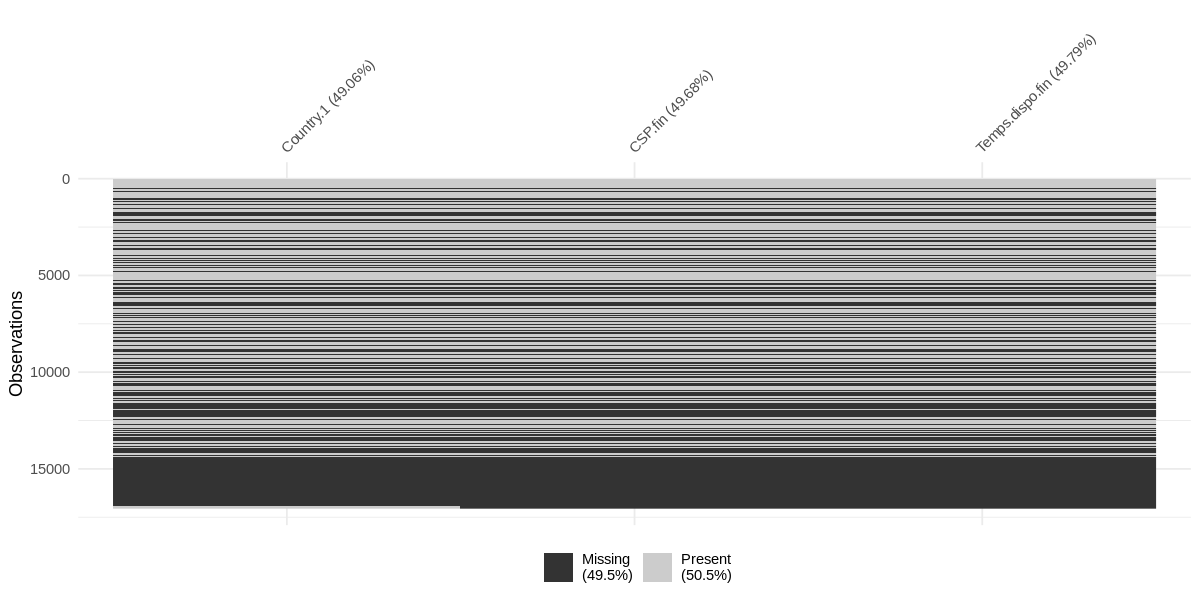

In [246]:
plot(vis_miss(df2_NecCol_clean[60:62], warn_large_data = FALSE))

# 2. Describing behavior in the courses

## Number of Users by country

In [247]:
sort(table(df2_NecCol_clean$Country), decreasing=TRUE)[1:10]


                        France                          Maroc 
                          6510                            248 
              C\xf4te d'Ivoire                       Cameroun 
                           215                            146 
                       Tunisie                     Alg\xe9rie 
                           125                             95 
                 S\xe9n\xe9gal                       Belgique 
                            84                             82 
Canada francophone (Qu\xe9bec)                   Burkina Faso 
                            80                             73 

In [248]:
levels(df2_NecCol_clean$Country) <- c(levels(df2_NecCol_clean$Country), "Canada") 
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="Canada francophone (Québec)"]  <- "Canada" 
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="Canada anglophone"]  <- "Canada" 

levels(df2_NecCol_clean$Country) <- c(levels(df2_NecCol_clean$Country), 'USA')
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="États-Unis d\'Amérique'"]  <- "USA" 
df2_NecCol_clean$Country[df2_NecCol_clean$Country =="Ã‰tats-Unis d\'Amérique"]  <- "USA" 

In [262]:
# Simple Bar Plot
# counts <- sort(table(df2_NecCol_clean$Country), decreasing=TRUE)[1:10]
# barplot(counts,xlab="Country",ylab="Number of users",cex.axis=1, cex.names=1.15)
# main="Countries with the greatest number of users enrolled in the MOOC"

# Presenting the proportions of learners activity

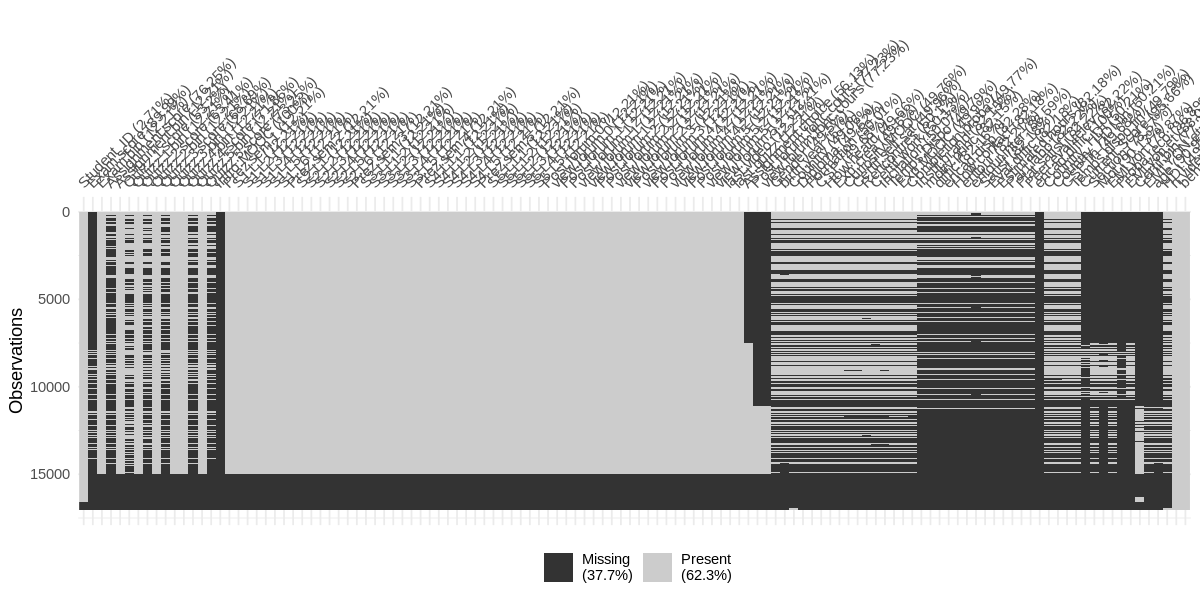

In [250]:
plot(vis_miss(df, warn_large_data = FALSE))

### subsetting the different categories “completers”, “disengaging learners”,“auditing learners”, and "bystanders" 

In [251]:
completers <- subset(df2_NecCol_clean, Exam.bin == 1)

auditing <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
                                    & df2_NecCol_clean$Quizz.2.bin ==0
                                    & df2_NecCol_clean$Quizz.3.bin ==0
                                    & df2_NecCol_clean$Quizz.4.bin ==0
                                    & df2_NecCol_clean$Quizz.5.bin ==0
                                    & df2_NecCol_clean$Assignment.bin ==0
                                    & df2_NecCol_clean$behaviour.index.percentage > 0.1),]
bystanders <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
                                    & df2_NecCol_clean$Quizz.2.bin ==0
                                    & df2_NecCol_clean$Quizz.3.bin ==0
                                    & df2_NecCol_clean$Quizz.4.bin ==0
                                    & df2_NecCol_clean$Quizz.5.bin ==0
                                    & df2_NecCol_clean$Assignment.bin ==0
                                    & df2_NecCol_clean$behaviour.index.percentage <= 0.1),]

bystanders<-anti_join(bystanders, auditing)


disengaging <- anti_join(df2_NecCol_clean, do.call("rbind", list(completers,auditing,bystanders)))
disengaging<-anti_join(disengaging, completers)


completers$behaviour = 'Completer'


disengaging$behaviour = 'Disenganger'

auditing$behaviour = 'Auditer'

bystanders$behaviour = 'Bystander'
df_categories <- do.call("rbind", list(completers,auditing,bystanders,disengaging))


Joining, by = c("Student_ID", "Assignment.bin", "Quizz.1.score", "Quizz.1.bin",
"Quizz.2.score", "Quizz.2.bin", "Quizz.3.score", "Quizz.3.bin", "Quizz.4.bin",
"Quizz.4.score", "Quizz.5.bin", "Quizz.5.score", "Prez.sem.1", "S1.L1",
"S1.L2", "S1.L3", "S1.L4", "S1.L5", "S1.L6", "Prez.sem.2", "S2.L1", "S2.L2",
"S2.L3", "S2.L4", "S2.L5", "S2.L6", "Prez.sem.3", "S3.L1.1", "S3.L1.2",
"S3.L2", "S3.L3", "S3.L4", "S3.L5", "Prez.sem.4", "S4.L1.1", "S4.L1.2",
"S4.L2", "S4.L3", "S4.L4", "S4.L5", "Prez.sem.5", "S5.L1.1", "S5.L1.2",
"S5.L2", "S5.L3", "S5.L4", "S5.L5", "last.video", "last.quizz", "Gender",
"birth.year", "Country", "Diploma", "Formation", "How.heard", "Exp.crea",
"Curiosity.MOOC", "Completion.proba", "Country_HDI", "Country.1", "CSP.fin",
"Temps.dispo.fin", "age", "Certif.bin", "Exam.bin", "HDI", "CSP", "n.videos",
"behaviour.index.percentage", "agegroup", "agegroup3")
Joining, by = c("Student_ID", "Assignment.bin", "Quizz.1.score", "Quizz.1.bin",
"Quizz.2.score", "Quizz.2.bin", "Quizz

In [252]:
df_categories <- do.call("rbind", list(completers,auditing,bystanders,disengaging))
head(df_categories)

,Student_ID,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,Quizz.3.bin,Quizz.4.bin,Quizz.4.score,⋯,age,Certif.bin,Exam.bin,HDI,CSP,n.videos,behaviour.index.percentage,agegroup,agegroup3,behaviour
,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<chr>
1205,11042,0,14,1,20,1,20.00,1,1,20,⋯,53,NA,1,TH,"Artisans, commer<e7>ants, chefs d'entreprise",3,0.08571429,"(50,60]","(50,80]",Completer
1444,11476,0,20,1,20,1,20.00,1,1,20,⋯,29,NA,1,TH,Etudiants,31,0.88571429,"[20,30]","(0,30]",Completer
1495,11577,0,17,1,18,1,17.33,1,1,20,⋯,56,NA,1,TH,Employ<e9>s,29,0.82857143,"(50,60]","(50,80]",Completer
1598,11748,0,16,1,20,1,19.33,1,1,20,⋯,30,NA,1,TH,Etudiants,34,0.97142857,"[20,30]","(0,30]",Completer
1629,11782,0,17,1,20,1,15.33,1,1,16,⋯,NA,NA,1,TH,Cadres et professions intellectuelles,5,0.14285714,NA,NA,Completer
1713,11879,0,19,1,20,1,18.00,1,1,20,⋯,35,NA,1,TH,Cadres et professions intellectuelles,34,0.97142857,"(30,40]","(30,50]",Completer


## adding the column behaviour 

In [253]:
df_new = do.call("rbind", list(completers, disengaging, auditing,bystanders))

In [254]:
dim(df2_NecCol_clean)

[1] 17056    71

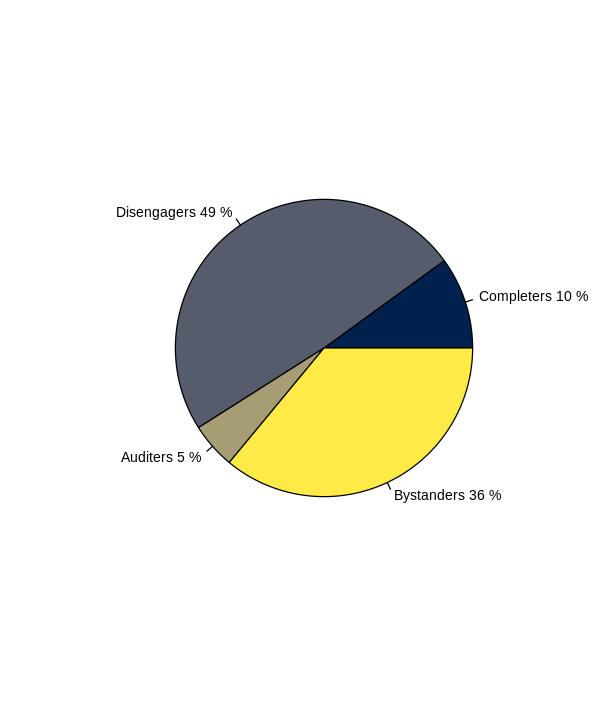

In [255]:
options(repr.plot.width=5, repr.plot.height=6)
Percent = c(round(nrow(completers[completers$Countr])/nrow(df_new)*100),round(nrow(disengaging)/nrow(df_new)*100),round(nrow(auditing)/nrow(df_new)*100),round(nrow(bystanders)/nrow(df_new)*100))
Company <- c("Completers", "Disengagers", "Auditers", "Bystanders"); 
pie(x = Percent, label=paste(Company, Percent, "%"), col=viridis(4, option = "E"), cex = 0.7 ,cex.lab=10) 
#, main="Learners engagment behaviour"

In [256]:
print(nrow(completers))
print(nrow(disengaging))
print(nrow(auditing))
print(nrow(bystanders))

[1] 1708
[1] 8427
[1] 774
[1] 6149


# 3. Linear Model

# T-test

In [257]:
(xtable(lm(n.videos~ Gender, data = df2_NecCol_clean)))

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),16.558119,0.1758582,94.156102,0.000000000
Genderune femme,1.037528,0.3057691,3.393176,0.000693986


In [258]:
T.Test <- t.test(n.videos~ Gender, data = df2_NecCol_clean)
T.Test


	Welch Two Sample t-test

data:  n.videos by Gender
t = -3.3705, df = 5574.8, p-value = 0.0007555
alternative hypothesis: true difference in means between group un homme and group une femme is not equal to 0
95 percent confidence interval:
 -1.6409962 -0.4340603
sample estimates:
 mean in group un homme mean in group une femme 
               16.55812                17.59565 


In [259]:
stargazer_htest = function (data, ...) {
    summary = data.frame(`Test statistic` = data$statistic,
                         DF = data$parameter,
                         `p value` = data$p.value,
                         `Alternative hypothesis` = data$alternative,
                         check.names = FALSE)
    stargazer(summary, flip = TRUE, summary = FALSE,
              notes = paste(data$method, data$data.name, sep = ': '), ...)
}

In [260]:
stargazer_htest(T.Test)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Nov 01, 2022 - 02:29:48 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} cc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & t \\ 
\hline \\[-1.8ex] 
Test statistic & -3.370452 \\ 
DF & 5574.774 \\ 
p value & 0.0007555496 \\ 
Alternative hypothesis & two.sided \\ 
\hline \\[-1.8ex] 
\multicolumn{2}{l}{Welch Two Sample t-test: n.videos by Gender} \\ 
\end{tabular} 
\end{table} 


## one and two way anova HDI and n.videos

In [263]:
options(scipen = 0)  

In [264]:
no.na.data <- na.omit(df2_NecCol_clean[c("Gender", "HDI","n.videos",'CSP','age','agegroup',"agegroup3",'Exam.bin')])

In [265]:
(xtable(lm(n.videos~ HDI, data = no.na.data)))

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.827545,0.4508071,19.581645,1.761504e-83
HDII,4.458668,0.7066669,6.309433,2.945979e-10
HDITH,9.477348,0.4777380,19.837959,1.399125e-85


In [266]:
anova(lm(n.videos~ HDI, data = no.na.data))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
HDI,2,75225.45,37612.7233,221.6495,1.792065e-94
Residuals,8191,1389968.41,169.6946,NA,NA


In [267]:
print(xtable(anova(lm(n.videos~ HDI, data = no.na.data))))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Tue Nov  1 02:30:18 2022
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
HDI & 2 & 75225.45 & 37612.72 & 221.65 & 0.0000 \\ 
  Residuals & 8191 & 1389968.41 & 169.69 &  &  \\ 
   \hline
\end{tabular}
\end{table}


### linear model of number of videos watched by gender and HDI

In [268]:
mod <-lm(n.videos~Gender+HDI, data = df2_NecCol_clean)
summary(mod)


Call:
lm(formula = n.videos ~ Gender + HDI, data = df2_NecCol_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-18.45 -11.45  -2.45  14.76  26.30 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.6972     0.4332  20.076  < 2e-16 ***
Genderune femme   0.2121     0.3031   0.700    0.484    
HDII              4.4439     0.6822   6.514 7.73e-11 ***
HDITH             9.5405     0.4624  20.634  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.99 on 8478 degrees of freedom
  (8574 observations deleted due to missingness)
Multiple R-squared:  0.05479,	Adjusted R-squared:  0.05446 
F-statistic: 163.8 on 3 and 8478 DF,  p-value: < 2.2e-16


In [269]:
#latex table
(xtable((mod)))

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.6972378,0.4332190,20.0758446,1.276379e-87
Genderune femme,0.2121116,0.3031072,0.6997905,4.840773e-01
HDII,4.4439322,0.6822092,6.5140315,7.732676e-11
HDITH,9.5404665,0.4623731,20.6336954,2.472357e-92


## using step

In [270]:
model <- lm(formula=as.formula(paste(paste("n.videos",'~', sep=''),
paste(c("Gender", "HDI",'CSP'),collapse='+'), sep='')),
            no.na.data)


In [271]:
summary(model)


Call:
lm(formula = as.formula(paste(paste("n.videos", "~", sep = ""), 
    paste(c("Gender", "HDI", "CSP"), collapse = "+"), sep = "")), 
    data = no.na.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.246 -11.642  -2.502  14.498  27.731 

Coefficients:
                                                                          Estimate
(Intercept)                                                                 5.2446
Genderune femme                                                             0.1400
HDII                                                                        4.5512
HDITH                                                                       9.5039
CSPArtisans, commer\xe7ants, chefs d'entreprise                             2.0248
CSPArtisans, commerçants, chefs d'entreprise                                4.3735
CSPArtisans, commer\xe7ants, chefs d'entreprise                             2.5230
CSPCadres et professions intellectuelles                         

In [272]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Gender,1,1629.177,1629.1767,9.639923,1.910441e-03
HDI,2,73638.489,36819.2444,217.861378,6.596812e-93
CSP,15,8325.985,555.0657,3.284352,1.652431e-05
Residuals,8175,1381600.201,169.0031,NA,NA


In [273]:
print(xtable(anova(model)))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Tue Nov  1 02:30:20 2022
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
Gender & 1 & 1629.18 & 1629.18 & 9.64 & 0.0019 \\ 
  HDI & 2 & 73638.49 & 36819.24 & 217.86 & 0.0000 \\ 
  CSP & 15 & 8325.99 & 555.07 & 3.28 & 0.0000 \\ 
  Residuals & 8175 & 1381600.20 & 169.00 &  &  \\ 
   \hline
\end{tabular}
\end{table}


# Model refinement, pairwise comparisons

In [274]:
model1 <- (lm(n.videos~HDI, no.na.data))
xtable(summary(model1))

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.827545,0.4508071,19.581645,1.761504e-83
HDII,4.458668,0.7066669,6.309433,2.945979e-10
HDITH,9.477348,0.4777380,19.837959,1.399125e-85


In [275]:
model1 <- (lm(n.videos~Gender+HDI+CSP, no.na.data))
summary(model1)


Call:
lm(formula = n.videos ~ Gender + HDI + CSP, data = no.na.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.246 -11.642  -2.502  14.498  27.731 

Coefficients:
                                                                          Estimate
(Intercept)                                                                 5.2446
Genderune femme                                                             0.1400
HDII                                                                        4.5512
HDITH                                                                       9.5039
CSPArtisans, commer\xe7ants, chefs d'entreprise                             2.0248
CSPArtisans, commerçants, chefs d'entreprise                                4.3735
CSPArtisans, commer\xe7ants, chefs d'entreprise                             2.5230
CSPCadres et professions intellectuelles                                    3.7536
CSPEmploy\xe9s                                                            

In [276]:
print((summary(model1)))


Call:
lm(formula = n.videos ~ Gender + HDI + CSP, data = no.na.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.246 -11.642  -2.502  14.498  27.731 

Coefficients:
                                                                          Estimate
(Intercept)                                                                 5.2446
Genderune femme                                                             0.1400
HDII                                                                        4.5512
HDITH                                                                       9.5039
CSPArtisans, commer\xe7ants, chefs d'entreprise                             2.0248
CSPArtisans, commerçants, chefs d'entreprise                                4.3735
CSPArtisans, commer\xe7ants, chefs d'entreprise                             2.5230
CSPCadres et professions intellectuelles                                    3.7536
CSPEmploy\xe9s                                                            

In [277]:
unique(no.na.data$HDI)

[1] "TH" "I"  "B"

In [278]:
model2 <- (lm(n.videos~Gender+HDI+CSP+ Gender*HDI, df2_NecCol_clean))
(summary(model2))


Call:
lm(formula = n.videos ~ Gender + HDI + CSP + Gender * HDI, data = df2_NecCol_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.182 -11.716  -2.577  14.423  27.696 

Coefficients:
                                                                          Estimate
(Intercept)                                                                8.76545
Genderune femme                                                            0.74170
HDII                                                                       5.18915
HDITH                                                                      9.65528
CSPArtisans, commer\xe7ants, chefs d'entreprise                           -1.46108
CSPArtisans, commerçants, chefs d'entreprise                               0.54261
CSPArtisans, commer\xe7ants, chefs d'entreprise                           -1.07358
CSPCadres et professions intellectuelles                                   0.01273
CSPEmploy\xe9s                                       

In [279]:
head(df)

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,⋯,Mot,EMLyon,Proba.reco,EMLyon.et,Certif.bin,EMLYON.et,age,HDI,n.videos,behaviour.index.percentage
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,28,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,0.02857143
2,36,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,0.00000000
3,45,NA,0,NA,0,16,1,20,1,18,⋯,NA,NA,NA,NA,NA,NA,NA,TH,30,0.85714286
4,83,NA,0,60,1,13,1,20,1,18,⋯,NA,NA,NA,NA,NA,NA,NA,I,27,0.77142857
5,84,NA,0,NA,0,18,1,20,1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,B,10,0.28571429
6,87,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,TH,2,0.05714286


In [280]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Gender,1,1917.868,1917.8676,11.413185,7.325469e-04
HDI,2,80640.895,40320.4476,239.946031,4.449067e-102
CSP,15,8153.718,543.5812,3.234839,2.174624e-05
Gender:HDI,2,374.403,187.2015,1.114032,3.282812e-01
Residuals,8438,1417918.588,168.0397,NA,NA


In [281]:
step(model2,direction = c('forward'))


Start:  AIC=43366.58
n.videos ~ Gender + HDI + CSP + Gender * HDI




Call:
lm(formula = n.videos ~ Gender + HDI + CSP + Gender * HDI, data = df2_NecCol_clean)

Coefficients:
                                                              (Intercept)  
                                                                  8.76545  
                                                          Genderune femme  
                                                                  0.74170  
                                                                     HDII  
                                                                  5.18915  
                                                                    HDITH  
                                                                  9.65528  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                 -1.46108  
                             CSPArtisans, commerçants, chefs d'entreprise  
                                                          

In [293]:
# step(model2,direction = c("both"))


In [288]:
model <- lm(formula=as.formula(paste(paste("n.videos",'~', sep=''), paste(c("Gender", "HDI",'CSP','agegroup'),collapse='+'), sep='')), no.na.data)

In [289]:
step(model,direction = c('forward'))


Start:  AIC=42027.43
n.videos ~ Gender + HDI + CSP + agegroup




Call:
lm(formula = n.videos ~ Gender + HDI + CSP + agegroup, data = no.na.data)

Coefficients:
                                                              (Intercept)  
                                                                   4.7804  
                                                          Genderune femme  
                                                                   0.1170  
                                                                     HDII  
                                                                   4.4491  
                                                                    HDITH  
                                                                   9.1184  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                   1.5620  
                             CSPArtisans, commerçants, chefs d'entreprise  
                                                                   3

In [290]:
step(model,direction = c("backward"))

Start:  AIC=42027.43
n.videos ~ Gender + HDI + CSP + agegroup

           Df Sum of Sq     RSS   AIC
- Gender    1        24 1375888 42026
<none>                  1375864 42027
- CSP      15      7272 1383137 42041
- agegroup  4      5736 1381600 42054
- HDI       2     62997 1438861 42390

Step:  AIC=42025.57
n.videos ~ HDI + CSP + agegroup

           Df Sum of Sq     RSS   AIC
<none>                  1375888 42026
- CSP      15      7297 1383186 42039
- agegroup  4      5746 1381635 42052
- HDI       2     64375 1440263 42396



Call:
lm(formula = n.videos ~ HDI + CSP + agegroup, data = no.na.data)

Coefficients:
                                                              (Intercept)  
                                                                   4.8086  
                                                                     HDII  
                                                                   4.4741  
                                                                    HDITH  
                                                                   9.1445  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                   1.5434  
                             CSPArtisans, commerçants, chefs d'entreprise  
                                                                   3.7400  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                   2.0566  
 

In [291]:
xtable(step(model,direction = c("both"),k=log(nrow(no.na.data))))

Start:  AIC=42188.68
n.videos ~ Gender + HDI + CSP + agegroup

           Df Sum of Sq     RSS   AIC
- CSP      15      7272 1383137 42097
- Gender    1        24 1375888 42180
- agegroup  4      5736 1381600 42187
<none>                  1375864 42189
- HDI       2     62997 1438861 42538

Step:  AIC=42096.71
n.videos ~ Gender + HDI + agegroup

           Df Sum of Sq     RSS   AIC
- Gender    1        49 1383186 42088
<none>                  1383137 42097
- agegroup  4      6790 1389926 42101
+ CSP      15      7272 1375864 42189
- HDI       2     64235 1447372 42451

Step:  AIC=42087.99
n.videos ~ HDI + agegroup

           Df Sum of Sq     RSS   AIC
<none>                  1383186 42088
- agegroup  4      6783 1389968 42092
+ Gender    1        49 1383137 42097
+ CSP      15      7297 1375888 42180
- HDI       2     65641 1448826 42450


,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.4388764,0.6014418,14.0310765,3.263667e-44
HDII,4.3870839,0.7076583,6.1994382,5.940857e-10
HDITH,9.0588714,0.4850688,18.6754367,2.967530e-76
"agegroup(30,40]",-0.1001961,0.4566469,-0.2194169,8.263308e-01
"agegroup(40,50]",1.0684387,0.4822002,2.2157574,2.673553e-02
"agegroup(50,60]",2.0399236,0.5226758,3.9028466,9.583020e-05
"agegroup(60,100]",2.4928633,0.6880734,3.6229615,2.930130e-04


In [283]:
(step(model,direction = c("both"), 
    criterion = c("BIC")))

Start:  AIC=42053.52
n.videos ~ Gender + HDI + CSP

         Df Sum of Sq     RSS   AIC
- Gender  1        34 1381635 42052
<none>                1381600 42054
- CSP    15      8326 1389926 42073
- HDI     2     70579 1452180 42458

Step:  AIC=42051.72
n.videos ~ HDI + CSP

         Df Sum of Sq     RSS   AIC
<none>                1381635 42052
+ Gender  1        34 1381600 42054
- CSP    15      8334 1389968 42071
- HDI     2     72250 1453884 42465



Call:
lm(formula = n.videos ~ HDI + CSP, data = no.na.data)

Coefficients:
                                                              (Intercept)  
                                                                    5.276  
                                                                     HDII  
                                                                    4.581  
                                                                    HDITH  
                                                                    9.536  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                    2.003  
                             CSPArtisans, commerçants, chefs d'entreprise  
                                                                    4.353  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                    2.518  
            

In [284]:
model <- lm(formula=as.formula(paste(paste("n.videos",'~', sep=''), paste(c('CSP',"Gender", "HDI"),collapse='+'), sep='')), no.na.data)

In [285]:
(step(model,direction = c("both"), 
    criterion = c("BIC")))

Start:  AIC=42053.52
n.videos ~ CSP + Gender + HDI

         Df Sum of Sq     RSS   AIC
- Gender  1        34 1381635 42052
<none>                1381600 42054
- CSP    15      8326 1389926 42073
- HDI     2     70579 1452180 42458

Step:  AIC=42051.72
n.videos ~ CSP + HDI

         Df Sum of Sq     RSS   AIC
<none>                1381635 42052
+ Gender  1        34 1381600 42054
- CSP    15      8334 1389968 42071
- HDI     2     72250 1453884 42465



Call:
lm(formula = n.videos ~ CSP + HDI, data = no.na.data)

Coefficients:
                                                              (Intercept)  
                                                                    5.276  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                    2.003  
                             CSPArtisans, commerçants, chefs d'entreprise  
                                                                    4.353  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                    2.518  
                                 CSPCadres et professions intellectuelles  
                                                                    3.736  
                                                           CSPEmploy\xe9s  
                                                                    3.084  
            

In [286]:
(step(model,direction = c("both"), 
    criterion = c("BIC")))

Start:  AIC=42053.52
n.videos ~ CSP + Gender + HDI

         Df Sum of Sq     RSS   AIC
- Gender  1        34 1381635 42052
<none>                1381600 42054
- CSP    15      8326 1389926 42073
- HDI     2     70579 1452180 42458

Step:  AIC=42051.72
n.videos ~ CSP + HDI

         Df Sum of Sq     RSS   AIC
<none>                1381635 42052
+ Gender  1        34 1381600 42054
- CSP    15      8334 1389968 42071
- HDI     2     72250 1453884 42465



Call:
lm(formula = n.videos ~ CSP + HDI, data = no.na.data)

Coefficients:
                                                              (Intercept)  
                                                                    5.276  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                    2.003  
                             CSPArtisans, commerçants, chefs d'entreprise  
                                                                    4.353  
                          CSPArtisans, commer\xe7ants, chefs d'entreprise  
                                                                    2.518  
                                 CSPCadres et professions intellectuelles  
                                                                    3.736  
                                                           CSPEmploy\xe9s  
                                                                    3.084  
            

In [287]:
nrow(no.na.data)

[1] 8194

### linear model of number of videos watched by gender and HDI with interaction parameter

In [294]:
mod1 <-lm(n.videos~Gender+HDI+Gender*HDI, data = no.na.data)
(mod1)


Call:
lm(formula = n.videos ~ Gender + HDI + Gender * HDI, data = no.na.data)

Coefficients:
          (Intercept)        Genderune femme                   HDII  
               8.6606                 1.1713                 5.1772  
                HDITH   Genderune femme:HDII  Genderune femme:HDITH  
               9.5620                -2.7756                -0.9375  


In [295]:
cat_cols <-c("Gender", "HDI")
no.na.data <- no.na.data %>% mutate_at(cat_cols, factor)


CrossTable(x=no.na.data$Gender, y=no.na.data$HDI,sresid=T, format = "SPSS")


   Cell Contents
|-------------------------|
|                   Count |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  8194 

                  | no.na.data$HDI 
no.na.data$Gender |        B  |        I  |       TH  | Row Total | 
------------------|-----------|-----------|-----------|-----------|
         un homme |      716  |      376  |     4398  |     5490  | 
                  |   43.806  |    0.163  |    4.859  |           | 
                  |   13.042% |    6.849% |   80.109% |   67.000% | 
                  |   85.749% |   65.620% |   64.810% |           | 
                  |    8.738% |    4.589% |   53.673% |           | 
                  |    6.619  |   -0.404  |   -2.204  |           | 
------------------|-----------|-----------|-----------|-----------|
        une femme |      119  |      197  |     2388  |     2704 

In [296]:
library(gmodels)
library(Hmisc)

# ANOVA 

### anova test number of videos watched by gender and HDI

In [297]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Gender,1,1942.741,1942.7411,11.5083,6.960283e-04
HDI,2,81024.131,40512.0655,239.9832,4.168823e-102
Residuals,8478,1431189.028,168.8121,NA,NA


In [298]:
print(xtable(anova(mod)))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Tue Nov  1 02:31:29 2022
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
Gender & 1 & 1942.74 & 1942.74 & 11.51 & 0.0007 \\ 
  HDI & 2 & 81024.13 & 40512.07 & 239.98 & 0.0000 \\ 
  Residuals & 8478 & 1431189.03 & 168.81 &  &  \\ 
   \hline
\end{tabular}
\end{table}


In [299]:
summary(mod)


Call:
lm(formula = n.videos ~ Gender + HDI, data = df2_NecCol_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-18.45 -11.45  -2.45  14.76  26.30 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.6972     0.4332  20.076  < 2e-16 ***
Genderune femme   0.2121     0.3031   0.700    0.484    
HDII              4.4439     0.6822   6.514 7.73e-11 ***
HDITH             9.5405     0.4624  20.634  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.99 on 8478 degrees of freedom
  (8574 observations deleted due to missingness)
Multiple R-squared:  0.05479,	Adjusted R-squared:  0.05446 
F-statistic: 163.8 on 3 and 8478 DF,  p-value: < 2.2e-16


In [300]:
print(xtable((mod1)))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Tue Nov  1 02:31:31 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 8.6606 & 0.4868 & 17.79 & 0.0000 \\ 
  Genderune femme & 1.1713 & 1.2896 & 0.91 & 0.3637 \\ 
  HDII & 5.1772 & 0.8296 & 6.24 & 0.0000 \\ 
  HDITH & 9.5620 & 0.5250 & 18.21 & 0.0000 \\ 
  Genderune femme:HDII & -2.7756 & 1.7250 & -1.61 & 0.1076 \\ 
  Genderune femme:HDITH & -0.9375 & 1.3314 & -0.70 & 0.4814 \\ 
   \hline
\end{tabular}
\end{table}


### ANOVA test of number of videos watched by gender and HDI with interaction parameter

In [301]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Gender,1,1629.1767,1629.1767,9.600973,1.951331e-03
HDI,2,73638.4888,36819.2444,216.981121,1.508727e-92
Gender:HDI,2,515.1115,257.5558,1.517813,2.192523e-01
Residuals,8188,1389411.0747,169.6887,NA,NA


In [302]:
print(xtable(anova(mod1)))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Tue Nov  1 02:31:34 2022
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
Gender & 1 & 1629.18 & 1629.18 & 9.60 & 0.0020 \\ 
  HDI & 2 & 73638.49 & 36819.24 & 216.98 & 0.0000 \\ 
  Gender:HDI & 2 & 515.11 & 257.56 & 1.52 & 0.2193 \\ 
  Residuals & 8188 & 1389411.07 & 169.69 &  &  \\ 
   \hline
\end{tabular}
\end{table}


## tukey HSD anova 

In [303]:
summary(fm1 <- aov(n.videos ~ Gender + HDI, data = no.na.data))
TukeyHSD(fm1, conf.level=.95)

              Df  Sum Sq Mean Sq F value  Pr(>F)    
Gender         1    1629    1629     9.6 0.00195 ** 
HDI            2   73638   36819   217.0 < 2e-16 ***
Residuals   8190 1389926     170                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = n.videos ~ Gender + HDI, data = no.na.data)

$Gender
                       diff       lwr      upr     p adj
une femme-un homme 0.948293 0.3483298 1.548256 0.0019526

$HDI
         diff      lwr       upr p adj
I-B  4.267787 2.611193  5.924380     0
TH-B 9.278788 8.158858 10.398719     0
TH-I 5.011002 3.682505  6.339498     0


In [304]:
model <-lm(n.videos~agegroup3, no.na.data)
summary(fm1 <- aov(model))
(TukeyHSD(fm1, conf.level=.95))

              Df  Sum Sq Mean Sq F value   Pr(>F)    
agegroup3      3   12883    4294   24.22 1.35e-15 ***
Residuals   8190 1452311     177                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = model)

$agegroup3
                       diff        lwr       upr     p adj
(30,50]-(0,30]   -0.4093002  -1.536038 0.7174374 0.7868830
(50,80]-(0,30]    2.5840762   1.296755 3.8713978 0.0000015
(80,100]-(0,30]  -5.7929017 -18.766092 7.1802890 0.6600914
(50,80]-(30,50]   2.9933764   2.076013 3.9107401 0.0000000
(80,100]-(30,50] -5.3836015 -18.325318 7.5581154 0.7085323
(80,100]-(50,80] -8.3769779 -21.333663 4.5797075 0.3444219


In [181]:
# install.packages('foreign')
# library(foreign)
install.packages('agricolae')
library(agricolae)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’, ‘klaR’, ‘AlgDesign’




In [305]:
model <-lm(n.videos~CSP, data = no.na.data)
fm1 <- aov(model)

In [307]:
# print(HSD.test(fm1, "CSP", group=TRUE))

# chi square

In [308]:
chisq.test(df$Gender, df$HDI)


	Pearson's Chi-squared test

data:  df$Gender and df$HDI
X-squared = 153.31, df = 2, p-value < 2.2e-16


## Mosaic plot


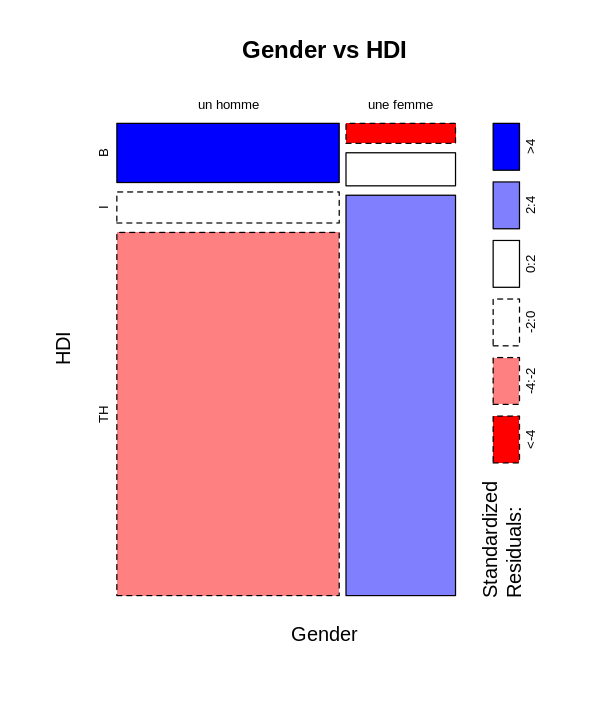

In [309]:
mosaicplot(~ Gender + HDI, data = no.na.data,
           main = "Gender vs HDI", shade = TRUE)

In [311]:
# install.packages('devtools')

In [312]:
library(MASS)


In [313]:
# library(readr)

print(xtable(prop.table(table(no.na.data$Gender, no.na.data$HDI))*100))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Tue Nov  1 02:32:12 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & B & I & TH \\ 
  \hline
un homme & 8.74 & 4.59 & 53.67 \\ 
  une femme & 1.45 & 2.40 & 29.14 \\ 
   \hline
\end{tabular}
\end{table}


# Pairwise comparisons

In [316]:
# pwc <- no.na.data %>% 
#   group_by(Gender,HDI,agegroup) %>%
#   emmeans_test(n.videos ~ CSP, p.adjust.method = "bonferroni") 
# summary(pwc)

In [317]:
m <- aov(n.videos ~ CSP + Gender + HDI, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = n.videos ~ CSP + Gender + HDI, data = no.na.data)

Linear Hypotheses:
                          Estimate Std. Error t value Pr(>|t|)
une femme - un homme == 0   0.1400     0.3145   0.445    0.656
(Adjusted p values reported -- single-step method)


In [318]:
m <- aov(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = n.videos ~ CSP + Gender + HDI + agegroup, data = no.na.data)

Linear Hypotheses:
                          Estimate Std. Error t value Pr(>|t|)
une femme - un homme == 0   0.1170     0.3136   0.373    0.709
(Adjusted p values reported -- single-step method)


In [319]:
#Tukey HSD with lm
m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = n.videos ~ CSP + Gender + HDI + agegroup, data = no.na.data)

Linear Hypotheses:
                          Estimate Std. Error t value Pr(>|t|)
une femme - un homme == 0   0.1170     0.3136   0.373    0.709
(Adjusted p values reported -- single-step method)


In [320]:
#Tukey HSD with lm

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(HDI = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = n.videos ~ CSP + Gender + HDI + agegroup, data = no.na.data)

Linear Hypotheses:
            Estimate Std. Error t value Pr(>|t|)    
I - B == 0    4.4491     0.6532   6.811   <1e-10 ***
TH - B == 0   9.1184     0.4172  21.857   <1e-10 ***
TH - I == 0   4.6693     0.5637   8.284   <1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [321]:
#Tukey HSD with lm on HDI

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(HDI = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = n.videos ~ CSP + Gender + HDI + agegroup, data = no.na.data)

Linear Hypotheses:
            Estimate Std. Error t value Pr(>|t|)    
I - B == 0    4.4491     0.6532   6.811   <1e-09 ***
TH - B == 0   9.1184     0.4172  21.857   <1e-09 ***
TH - I == 0   4.6693     0.5637   8.284   <1e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [322]:
#Tukey HSD with lm on GENDER

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = n.videos ~ CSP + Gender + HDI + agegroup, data = no.na.data)

Linear Hypotheses:
                          Estimate Std. Error t value Pr(>|t|)
une femme - un homme == 0   0.1170     0.3136   0.373    0.709
(Adjusted p values reported -- single-step method)


In [323]:
#Tukey HSD with lm

m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(HDI = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = n.videos ~ CSP + Gender + HDI + agegroup, data = no.na.data)

Linear Hypotheses:
            Estimate Std. Error t value Pr(>|t|)    
I - B == 0    4.4491     0.6532   6.811   <1e-10 ***
TH - B == 0   9.1184     0.4172  21.857   <1e-10 ***
TH - I == 0   4.6693     0.5637   8.284   <1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [326]:
#Tukey HSD with lm

# m <- lm(n.videos ~ CSP , no.na.data)

# tukey <- glht(m, linfct = mcp(CSP = "Tukey") , vcov = sandwich)

# (summary(tukey, test = adjusted()))

In [325]:
m <- lm(n.videos ~ CSP + Gender + HDI + agegroup, no.na.data)

tukey <- glht(m, linfct = mcp(Gender = "Tukey") , vcov = sandwich)

summary(tukey, test = adjusted())


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = n.videos ~ CSP + Gender + HDI + agegroup, data = no.na.data)

Linear Hypotheses:
                          Estimate Std. Error t value Pr(>|t|)
une femme - un homme == 0   0.1170     0.3136   0.373    0.709
(Adjusted p values reported -- single-step method)


In [327]:
options(repr.plot.width=5, repr.plot.height=5)

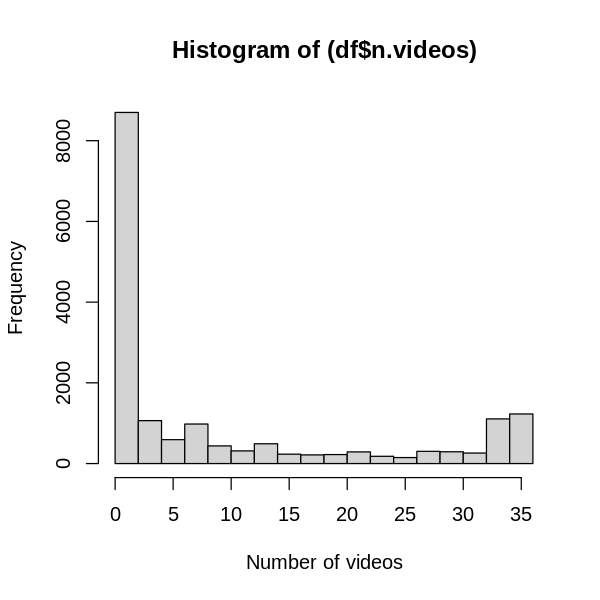

In [328]:
hist((df$n.videos), ylab = 'Frequency',xlab='Number of videos')

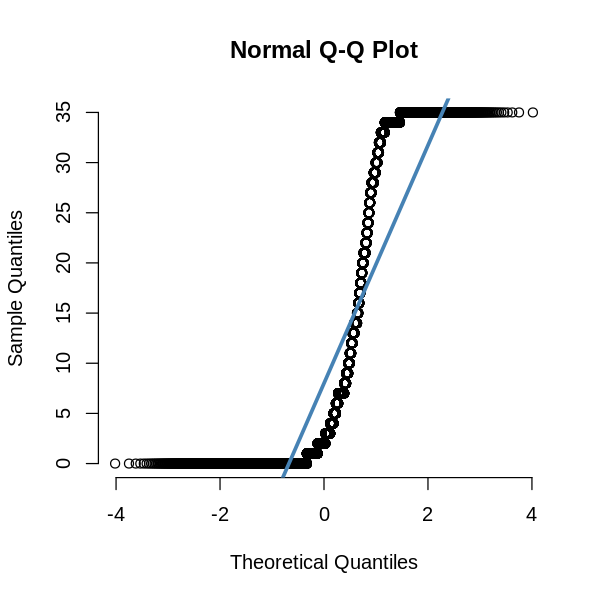

In [329]:
qqnorm(df$n.videos, pch = 1, frame = FALSE)
qqline(df$n.videos ,col = "steelblue", lwd = 3)

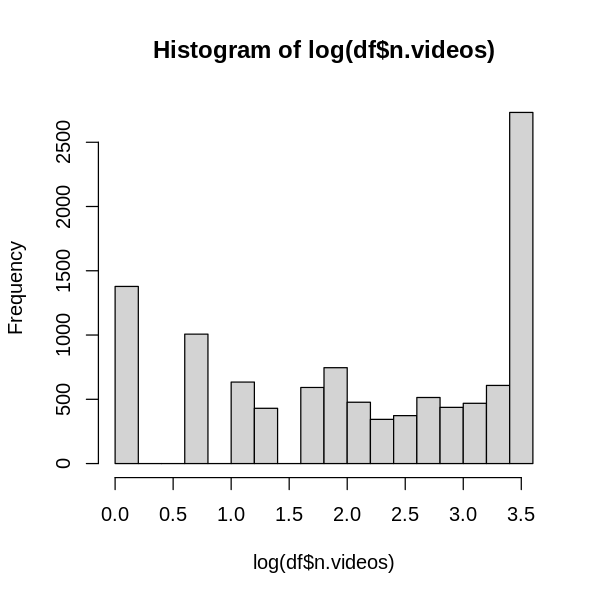

In [330]:
hist(log(df$n.videos))

# Logistic regression

In [393]:
# head(no.na.data)

In [332]:
mod <- glm(Exam.bin ~  Gender + HDI , family='binomial' , data = no.na.data)
(summary(mod))


Call:
glm(formula = Exam.bin ~ Gender + HDI, family = "binomial", data = no.na.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6892  -0.6507  -0.6507  -0.5719   1.9450  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.72799    0.09650 -17.907  < 2e-16 ***
Genderune femme  0.12833    0.05931   2.164  0.03049 *  
HDII             0.14081    0.14632   0.962  0.33588    
HDITH            0.28320    0.10160   2.787  0.00531 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8014.8  on 8193  degrees of freedom
Residual deviance: 7999.1  on 8190  degrees of freedom
AIC: 8007.1

Number of Fisher Scoring iterations: 4


In [333]:
print(xtable((summary(mod))))

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Tue Nov  1 02:34:01 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & z value & Pr($>$$|$z$|$) \\ 
  \hline
(Intercept) & -1.7280 & 0.0965 & -17.91 & 0.0000 \\ 
  Genderune femme & 0.1283 & 0.0593 & 2.16 & 0.0305 \\ 
  HDII & 0.1408 & 0.1463 & 0.96 & 0.3359 \\ 
  HDITH & 0.2832 & 0.1016 & 2.79 & 0.0053 \\ 
   \hline
\end{tabular}
\end{table}


In [334]:
mod <- glm(Exam.bin ~  relevel(Gender, ref = "une femme") + HDI  , data = no.na.data)
(summary(mod))


Call:
glm(formula = Exam.bin ~ relevel(Gender, ref = "une femme") + 
    HDI, data = no.na.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2112  -0.1909  -0.1909  -0.1504   0.8496  

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 0.170684   0.015797  10.805
relevel(Gender, ref = "une femme")un homme -0.020281   0.009331  -2.173
HDII                                        0.018890   0.021433   0.881
HDITH                                       0.040515   0.014566   2.782
                                           Pr(>|t|)    
(Intercept)                                 < 2e-16 ***
relevel(Gender, ref = "une femme")un homme  0.02978 *  
HDII                                        0.37817    
HDITH                                       0.00542 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1549033)


In [335]:
exp(coef(mod))

(Intercept) 
                                 1.1861157 
relevel(Gender, ref = "une femme")un homme 
                                 0.9799235 
                                      HDII 
                                 1.0190691 
                                     HDITH 
                                 1.0413468

In [339]:
# library(extrafont)
# font_import()
# loadfonts(device="win") 

In [340]:
options(repr.plot.width=7.5, repr.plot.height=3)

In [342]:
# no.na.data %>% 
#   or_plot('Exam.bin', c('Gender','HDI'),
#           table_text_size = 4)

In [343]:
# no.na.data %>% 
#   forestplot(labeltext = Exam.bin, 
#              is.summary = c(rep(TRUE, 2), rep(FALSE, 8), TRUE),
#              clip = c(0.1, 2.5), 
#              xlog = TRUE, 
#              col = fpColors(box = "royalblue",
#                             line = "darkblue",
#                             summary = "royalblue"))

In [345]:
# no.na.data %>% 
#   or_plot('Exam.bin', c('Gender','HDI'),
#           table_text_size = 3.5,remove_ref = TRUE)


In [347]:
# df22 <- no.na.data %>% 
#   mutate(Gender = factor(Gender, levels = c( "une femme","un homme"))) %>% 
#   mutate(HDI = factor(HDI, levels = c("TH", "I", "B")))


# no.na.data %>% 
#   mutate(Gender = factor(Gender, levels = c( "une femme","un homme"))) %>% 
#   mutate(HDI = factor(HDI, levels = c("TH", "I", "B"))) %>%
#   or_plot('Exam.bin', c('Gender',"HDI"))

 # Poisson dist

In [348]:
mod <- glm(n.videos ~  Gender + HDI  , data = no.na.data, family='poisson')
(summary(mod))


Call:
glm(formula = n.videos ~ Gender + HDI, family = "poisson", data = no.na.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0679  -3.3714  -0.6601   3.0981   6.6441  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.176612   0.011676 186.419   <2e-16 ***
Genderune femme 0.008843   0.005677   1.558    0.119    
HDII            0.407066   0.016381  24.850   <2e-16 ***
HDITH           0.727436   0.012047  60.382   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 101542  on 8193  degrees of freedom
Residual deviance:  96387  on 8190  degrees of freedom
AIC: 129305

Number of Fisher Scoring iterations: 5


In [349]:
install.packages('fitdistrplus')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [350]:
options(repr.plot.width=15, repr.plot.height=5)


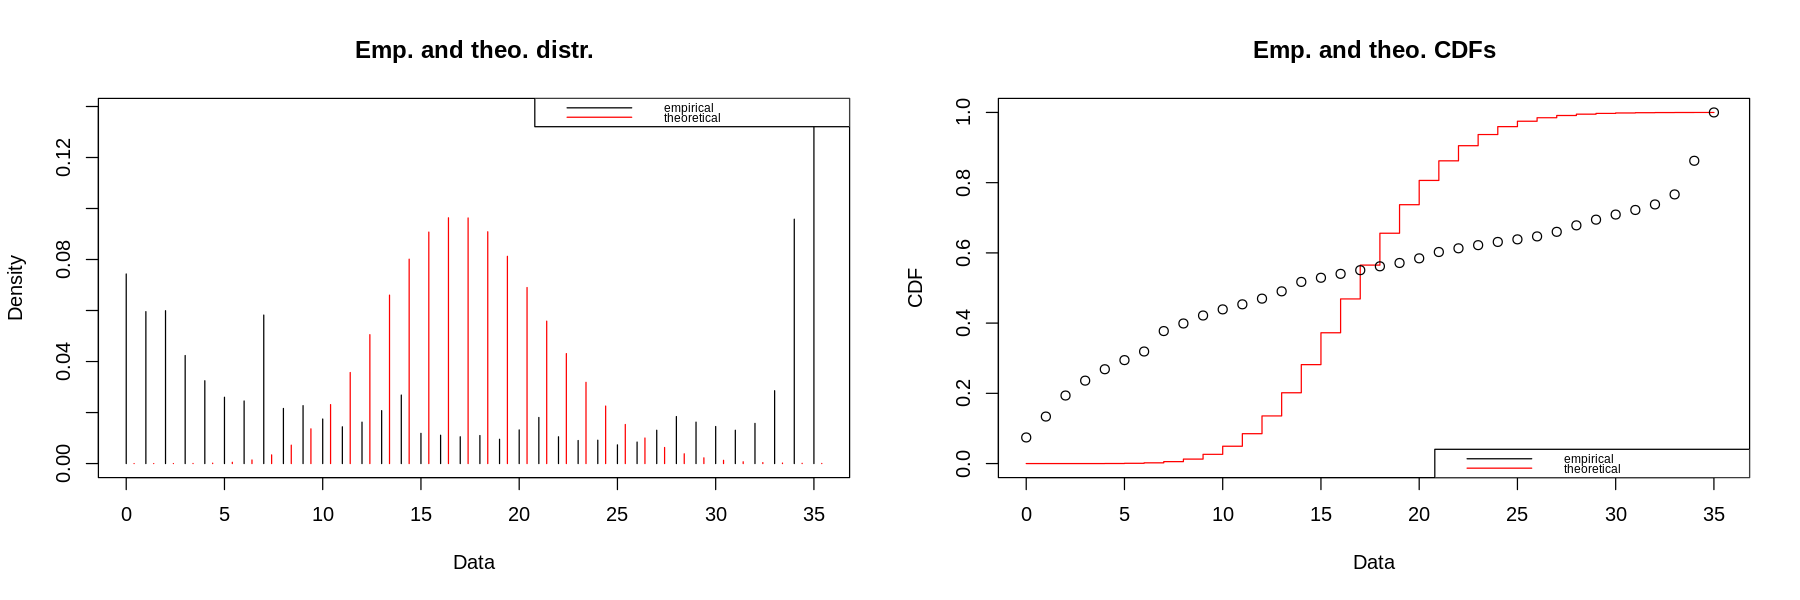

In [351]:
library('fitdistrplus')
plot(fitdist(no.na.data$n.videos,"pois"))

In [352]:
install.packages('vcd')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lmtest’




In [353]:
# # load the vcd package
# library(vcd) ## loading vcd package

# # generate two processes for test
# # set.seed(2014);y=rpois(200,5)
# # set.seed(2014);y=rnorm(100, 5, 0.3) # goodfit asks for non-negative values
# # output the results
# gf = goodfit(no.na.data$n.videos,type= "poisson",method= "ML")
# plot(gf,main="Number of videos frequency vs Poisson distribution",xlab='Number of videos')
# summary(gf)

# # to automatically get the pvalue
# gf.summary = capture.output(summary(gf))[[5]]
# pvalue = unlist(strsplit(gf.summary, split = " "))
# pvalue = as.numeric(pvalue[length(pvalue)]); pvalue

# # to mannualy compute the pvalue
# chisq = sum(  (gf$observed-gf$fitted)^2/gf$fitted )

# df = length(gf$observed)-1-1
# pvalue = pchisq(chisq,df)
# print(paste('pvalue: ',pvalue))

In [354]:
(xtable((summary(mod))))

,Estimate,Std. Error,z value,Pr(>|z|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.176611849,0.011675886,186.419416,0.000000e+00
Genderune femme,0.008843276,0.005676659,1.557831,1.192733e-01
HDII,0.407065837,0.016380847,24.850110,2.578815e-136
HDITH,0.727435638,0.012047311,60.381578,0.000000e+00


## pseudo R^2

In [355]:
pR2 = 1 - mod$deviance / mod$null.deviance
pR2

[1] 0.05077018

# Survival analysis

In [356]:
tenCols <-list(c(0,0,0,0,0,0,0,0,0,0),
c(1,0,0,0,0,0,0,0,0,0),
c(1,1,0,0,0,0,0,0,0,0),
c(1,1,1,0,0,0,0,0,0,0),
c(1,1,1,1,0,0,0,0,0,0),
c(1,1,1,1,1,0,0,0,0,0),
c(1,1,1,1,1,1,0,0,0,0),
c(1,1,1,1,1,1,1,0,0,0),
c(1,1,1,1,1,1,1,1,0,0),
c(1,1,1,1,1,1,1,1,1,0),
c(1,1,1,1,1,1,1,1,1,1))
dataCols<-list()
for (i in df$behaviour.index.percentage){
    if (as.numeric(i)<0.1){dataCols <- append(dataCols,tenCols[1])}
    if (i>=0.1 & i < 0.2){append(dataCols,tenCols[2])}
    if (i>=0.2 & i < 0.3){append(dataCols,tenCols[3])}
    if (i>=0.3 & i < 0.4){append(dataCols,tenCols[4])}
    if (i>=0.4 & i < 0.5){append(dataCols,tenCols[5])}
    if (i>=0.5 & i < 0.6){append(dataCols,tenCols[6])}
    if (i>=0.6 & i < 0.7){append(dataCols,tenCols[7])}
    if (i>=0.7 & i < 0.8){append(dataCols,tenCols[8])}
    if (i>=0.8 & i < 0.9){append(dataCols,tenCols[9])}
    if (i>=0.9 & i < 1){append(dataCols,tenCols[10])}
    if ( i == 1){append(dataCols,tenCols[11])}
}

In [357]:
str(df$behaviour.index.percentage)

 num [1:17056] 0.0286 0 0.8571 0.7714 0.2857 ...


In [358]:
df$statut.surv.vid=rep(NA, nrow(df))
for (i in 1:nrow(df)) {
    if (df$n.videos[i]<35) {df$statut.surv.vid[i]=1}
    if (df$n.videos[i]==35) {df$statut.surv.vid[i]=0}  }

In [359]:
km_fit <- survfit(Surv(n.videos, statut.surv.vid) ~ 1, data=df)
summary(km_fit)


Call: survfit(formula = Surv(n.videos, statut.surv.vid) ~ 1, data = df)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0  17056    6315   0.6297 0.00370       0.6225        0.637
    1  10741    1378   0.5490 0.00381       0.5415        0.556
    2   9363    1007   0.4899 0.00383       0.4825        0.497
    3   8356     634   0.4527 0.00381       0.4453        0.460
    4   7722     430   0.4275 0.00379       0.4202        0.435
    5   7292     309   0.4094 0.00377       0.4021        0.417
    6   6983     283   0.3928 0.00374       0.3856        0.400
    7   6700     746   0.3491 0.00365       0.3420        0.356
    8   5954     233   0.3354 0.00362       0.3284        0.343
    9   5721     244   0.3211 0.00358       0.3142        0.328
   10   5477     194   0.3097 0.00354       0.3029        0.317
   11   5283     150   0.3009 0.00351       0.2941        0.308
   12   5133     164   0.2913 0.00348       0.2846        0.298
   13   4969     209   0.2791 0

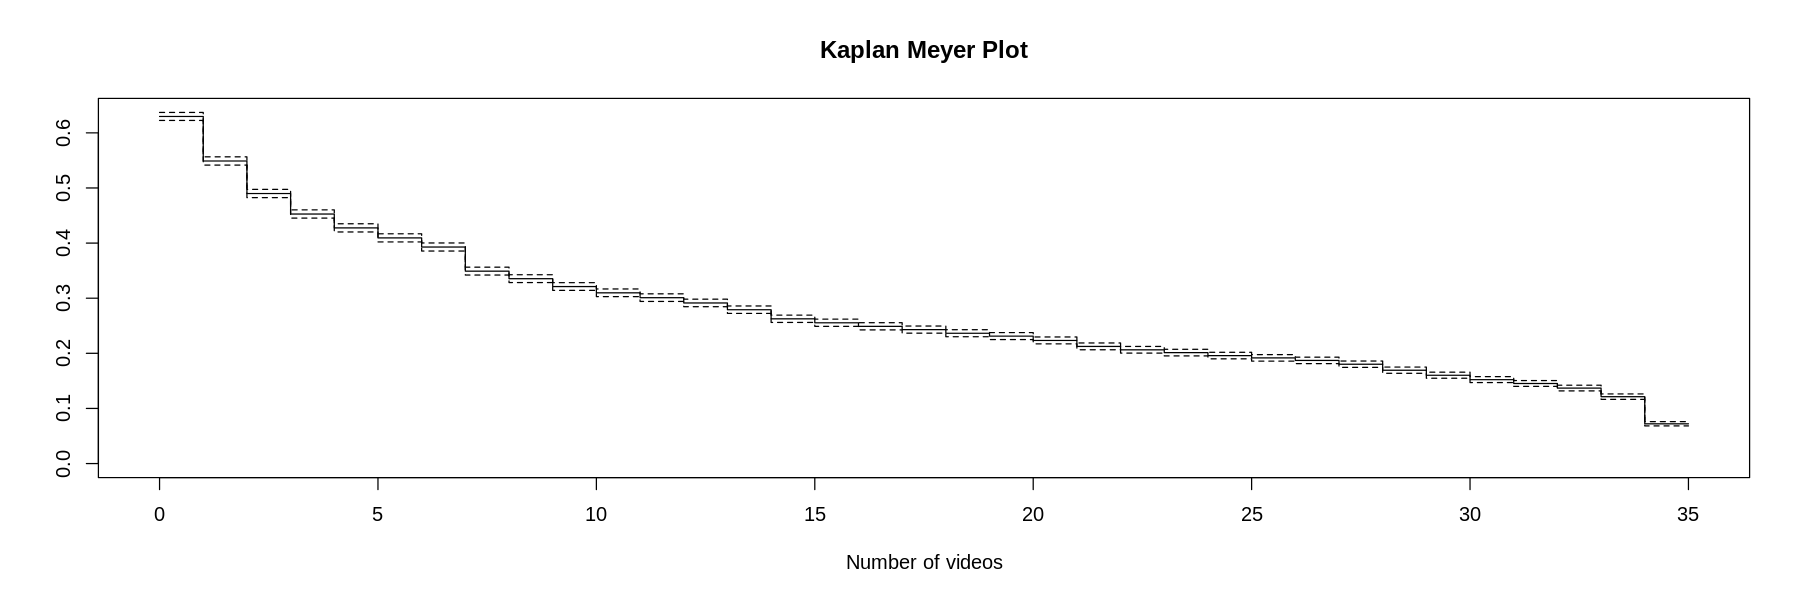

In [360]:
plot(km_fit, xlab="Number of videos", main = 'Kaplan Meyer Plot')

In [361]:
df_categories$statut.surv.vid=rep(NA, nrow(df_categories))
for (i in 1:nrow(df_categories)) {
    if (df_categories$n.videos[i]<35) {df_categories$statut.surv.vid[i]=1}
    if (df_categories$n.videos[i]==35) {df_categories$statut.surv.vid[i]=0}  }


In [362]:
# completers <- subset(df2_NecCol_clean, Exam.bin == 1)

# auditing <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
#                                     & df2_NecCol_clean$Quizz.2.bin ==0
#                                     & df2_NecCol_clean$Quizz.3.bin ==0
#                                     & df2_NecCol_clean$Quizz.4.bin ==0
#                                     & df2_NecCol_clean$Quizz.5.bin ==0
#                                     & df2_NecCol_clean$Assignment.bin ==0
#                                     & df2_NecCol_clean$behaviour.index.percentage > 0.1),]
# bystanders <- df2_NecCol_clean[which(df2_NecCol_clean$Quizz.1.bin ==0
#                                     & df2_NecCol_clean$Quizz.2.bin ==0
#                                     & df2_NecCol_clean$Quizz.3.bin ==0
#                                     & df2_NecCol_clean$Quizz.4.bin ==0
#                                     & df2_NecCol_clean$Quizz.5.bin ==0
#                                     & df2_NecCol_clean$Assignment.bin ==0
#                                     & df2_NecCol_clean$behaviour.index.percentage <= 0.1),]

# bystanders<-anti_join(bystanders, auditing)


# disengaging <- anti_join(df2_NecCol_clean, do.call("rbind", list(completers,auditing,bystanders)))
# disengaging<-anti_join(disengaging, completers)


# completers$behaviour = 'Completer'


# disengaging$behaviour = 'Disenganger'

# auditing$behaviour = 'Auditer'

# bystanders$behaviour = 'Bystander'
# df_categories <- do.call("rbind", list(completers,auditing,bystanders,disengaging))


# km_fit <- survfit(Surv(n.videos, statut.surv.vid) ~ behaviour, data=df_categories)
# plot(km_fit, xlab="Number of videos", main = 'Kaplan Meyer Plot')


df$engagement.behaviour <- NA
# df[which(df$Quizz.1.bin ==0
#         & df$Quizz.2.bin ==0
#         & df$Quizz.3.bin ==0
#         & df$Quizz.4.bin ==0
#         & df$Quizz.5.bin ==0
#         & df$Assignment.bin ==0
#         & df$behaviour.index.percentage > 0.1),]engagement.behaviour <- 'Auditer'
# df$d[df$a==5] <- 0
# df$d[df$a==6] <- df$b[df$a==6]

In [363]:
df[which(df$Quizz.1.bin ==0
        & df$Quizz.2.bin ==0
        & df$Quizz.3.bin ==0
        & df$Quizz.4.bin ==0
        & df$Quizz.5.bin ==0
        & df$Assignment.bin ==0
        & df$behaviour.index.percentage > 0.1),]$engagement.behaviour <- 'Auditer' 


df[which(df$Exam.bin == 1),]$engagement.behaviour <- 'Completer'


df[which(df$Quizz.1.bin ==0
        & df$Quizz.2.bin ==0
        & df$Quizz.3.bin ==0
        & df$Quizz.4.bin ==0
        & df$Quizz.5.bin ==0
        & df$Assignment.bin ==0
        & df$behaviour.index.percentage <= 0.1),]$engagement.behaviour <- 'Bystander'


df$engagement.behaviour[is.na(df$engagement.behaviour)] <- 'Disengager'

In [365]:
head(df)

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,⋯,Proba.reco,EMLyon.et,Certif.bin,EMLYON.et,age,HDI,n.videos,behaviour.index.percentage,statut.surv.vid,engagement.behaviour
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,28,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,1,0.02857143,1,Bystander
2,36,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,NA,0,0.00000000,1,Bystander
3,45,NA,0,NA,0,16,1,20,1,18,⋯,NA,NA,NA,NA,NA,TH,30,0.85714286,1,Disengager
4,83,NA,0,60,1,13,1,20,1,18,⋯,NA,NA,NA,NA,NA,I,27,0.77142857,1,Disengager
5,84,NA,0,NA,0,18,1,20,1,NA,⋯,NA,NA,NA,NA,NA,B,10,0.28571429,1,Disengager
6,87,NA,0,NA,0,NA,0,NA,0,NA,⋯,NA,NA,NA,NA,NA,TH,2,0.05714286,1,Bystander


In [366]:
n.videos_dec = quantile(df$n.videos, probs = seq(.1, .9, by = .1))



df<-df %>%mutate(n.videos.decile = ntile(n.videos, 10))



df$status.vid=rep(NA, nrow(df))
for (i in 1:nrow(df)) {
    if (df$n.videos.decile[i]<10) {df$status.vid[i]=1}
    if (df$n.videos.decile[i]==10) {df$status.vid[i]=0}
}


In [369]:
# km_fit <- survfit(Surv(n.videos, statut.surv.vid) ~ HDI, data=df)
# plot(km_fit, xlab="Number of videos", main = 'Kaplan Meyer Plot', col=c('red','blue','green','yellow')) 

In [372]:
# fit2 <- survfit(Surv(n.videos, statut.surv.vid) ~ HDI, data=df)
# ggsurvplot(fit2, data = df)

## main plot

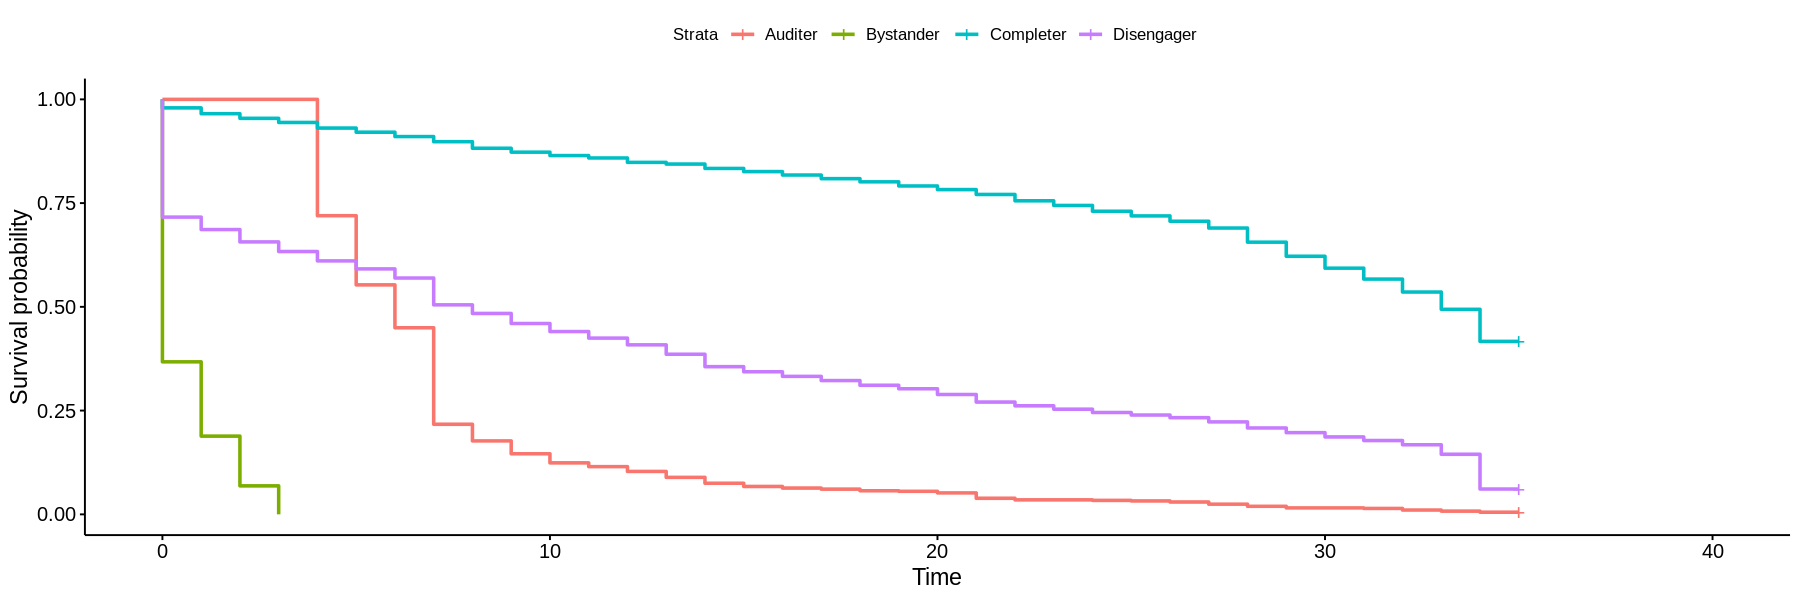

In [373]:
fit <- survfit(Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data=df)
names(fit$strata) <- gsub("engagement.behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df, surv.median.line="none")

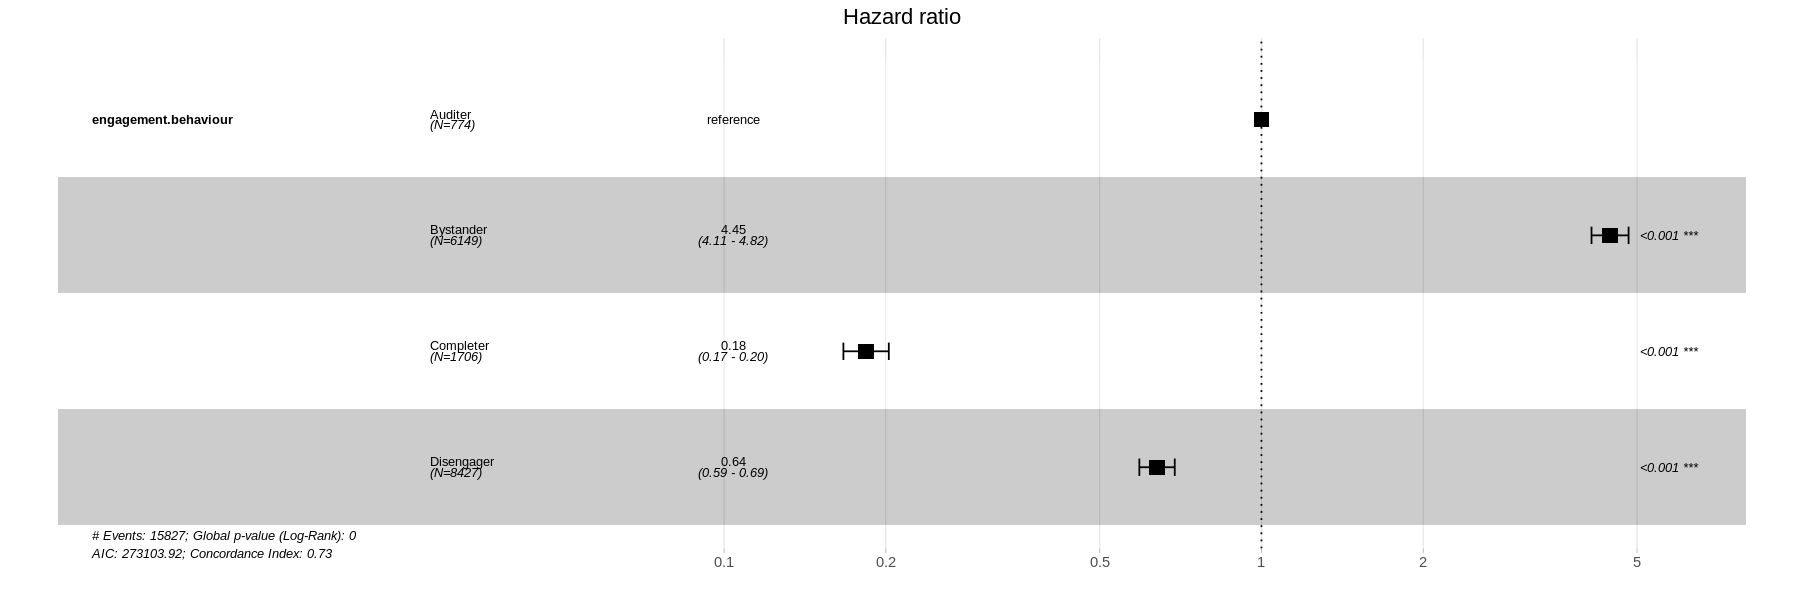

In [374]:
mod_cox <- coxph(formula = Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data = df)
ggforest(mod_cox,data=df)

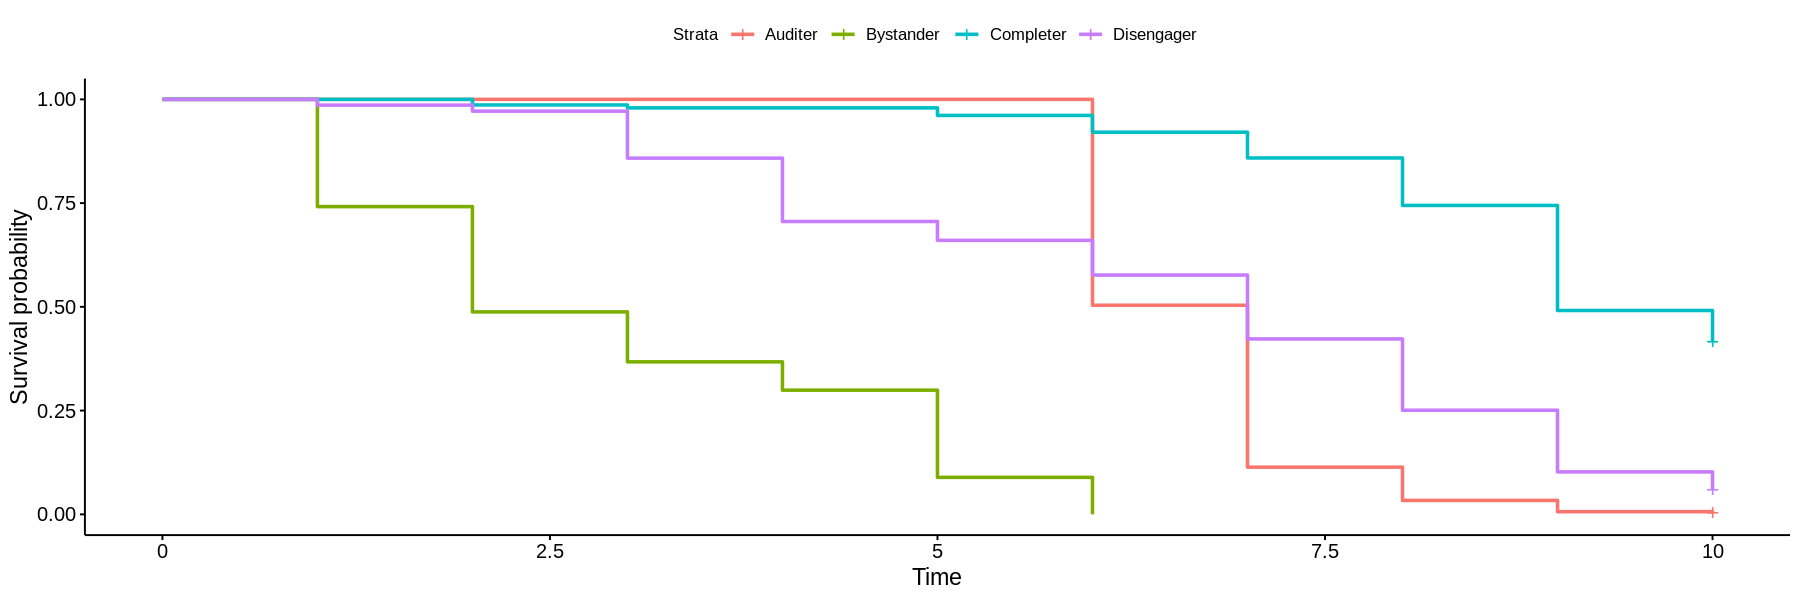

In [375]:
fit <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ engagement.behaviour, data=df)
names(fit$strata) <- gsub("engagement.behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df, surv.median.line="none")

In [378]:
# fit2 <- survfit(Surv(n.videos, statut.surv.vid) ~ HDI, data=df)
# ggsurvplot(fit2, data = df)

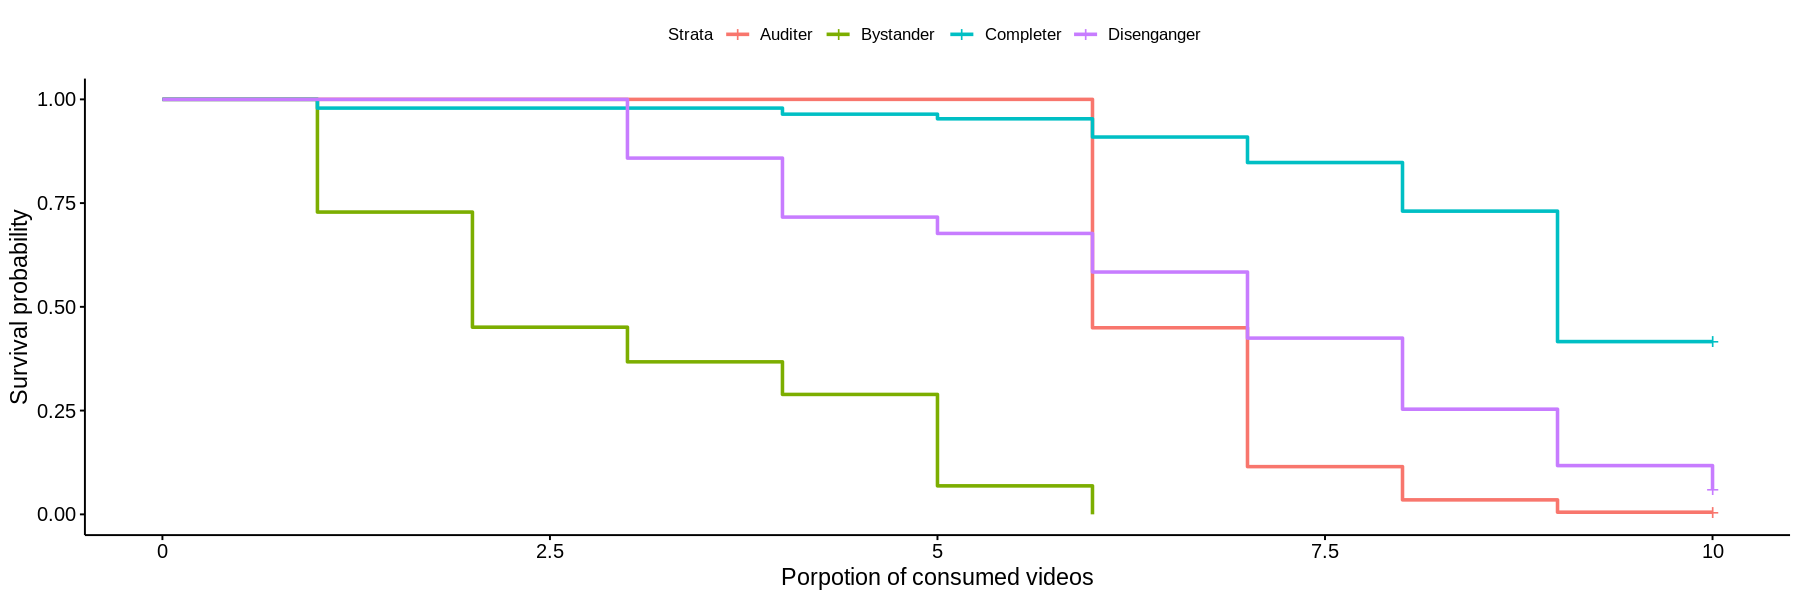

In [377]:
n.videos_dec = quantile(df_categories$n.videos, probs = seq(.1, .9, by = .1))



df_categories<-df_categories %>%mutate(n.videos.decile = ntile(n.videos, 10))



df_categories$status.vid=rep(NA, nrow(df_categories))
for (i in 1:nrow(df_categories)) {
    if (df_categories$n.videos.decile[i]<10) {df_categories$status.vid[i]=1}
    if (df_categories$n.videos.decile[i]==10) {df_categories$status.vid[i]=0}
}



fit <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ behaviour, data=df_categories)
names(fit$strata) <- gsub("behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df_categories, surv.median.line="none",xlab = "Porpotion of consumed videos")

In [379]:
df_categories$behaviour <- as.factor(df_categories$behaviour)
df_categories$behaviour = relevel(df_categories$behaviour, ref = "Completer")

In [380]:
library("survival")
library("survminer")

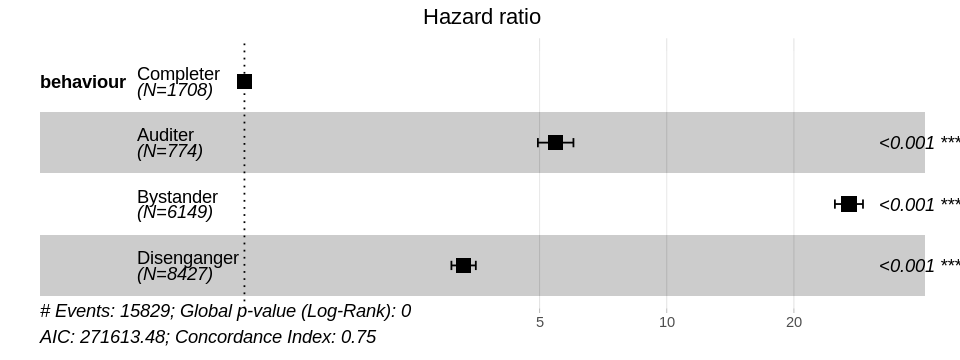

In [381]:
options(repr.plot.width=8, repr.plot.height=3)
mod_cox <- coxph(formula = Surv(n.videos.decile, statut.surv.vid) ~ behaviour, data=df_categories)
# a <- ggforest(mod_cox)
# ggforest(mod_cox, font.x.size = 20)

ggforest(mod_cox, fontsize = 1,
  cpositions = c(0,0.11,3),data=df_categories)

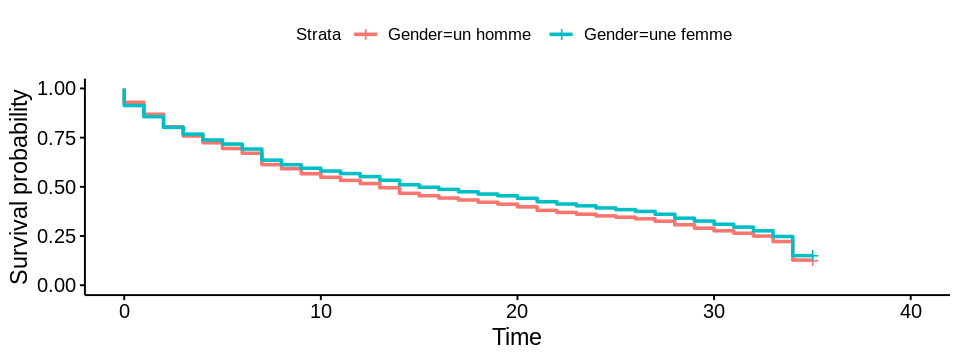

In [382]:
fit2 <- survfit(Surv(n.videos, statut.surv.vid) ~ Gender, data=df)
ggsurvplot(fit2, data = df)

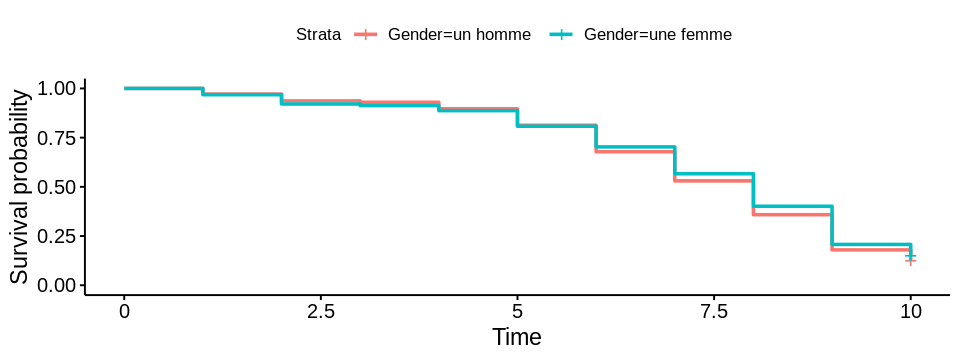

In [384]:
fit2 <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ Gender, data=df)
ggsurvplot(fit2, data = df)

In [391]:
# fit2 <- survfit(Surv(n.videos.decile, statut.surv.vid) ~ HDI, data=df)
# ggsurvplot(fit2, data = df)

ERROR: ignored

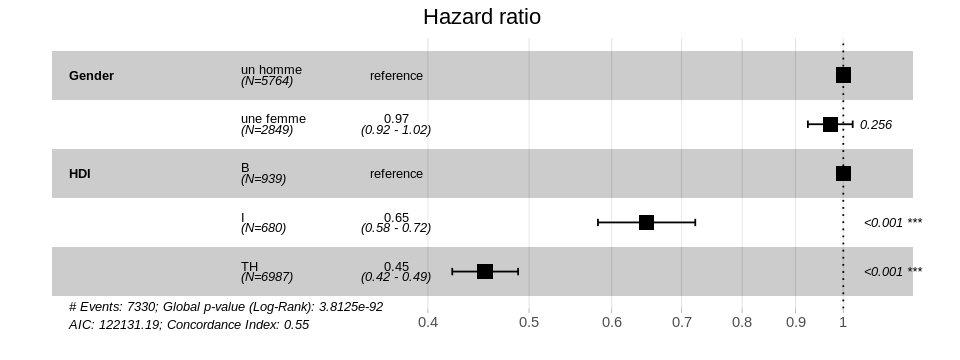

In [392]:
mod_cox <- coxph(formula = Surv(n.videos, statut.surv.vid) ~ Gender + HDI, data = df)
ggforest(mod_cox,data=df)
ggsurvplot(mod_cox, conf.int = TRUE, palette = "Dark2",censor = FALSE, surv.median.line = "hv")

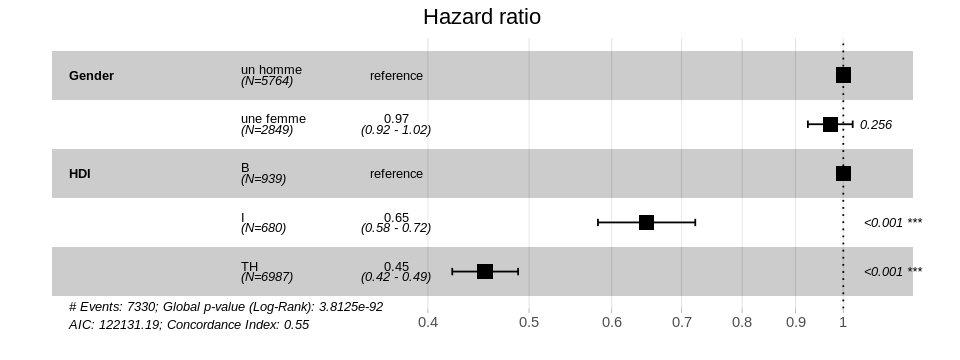

In [387]:
ggforest(mod_cox,data=df)

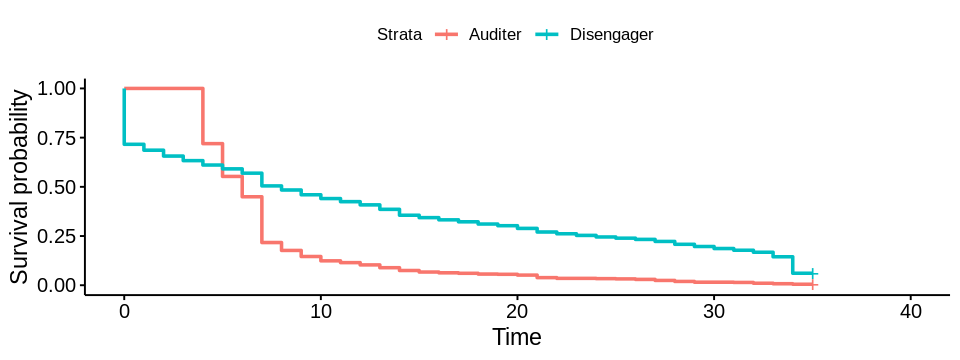

In [389]:
fit <- survfit(Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data=df[df$engagement.behaviour %in% c('Disengager','Auditer'),])
names(fit$strata) <- gsub("engagement.behaviour=", "", names(fit$strata))
ggsurvplot(fit, data = df, surv.median.line="none")

In [390]:
survdiff(Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, data=df[df$engagement.behaviour %in% c('Disengager','Auditer'),])

Call:
survdiff(formula = Surv(n.videos, statut.surv.vid) ~ engagement.behaviour, 
    data = df[df$engagement.behaviour %in% c("Disengager", "Auditer"), 
        ])

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
engagement.behaviour=Auditer     774      770      497    149.52       192
engagement.behaviour=Disengager 8427     7913     8186      9.08       192

 Chisq= 192  on 1 degrees of freedom, p= <2e-16 